<a href="https://colab.research.google.com/github/hamidrg/st/blob/main/SpecialTopic_HM01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests

url = "https://business.yelp.com/external-assets/files/Yelp-JSON.zip"
filename = "Yelp-JSON.zip"

# Adding a User-Agent header to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

response = requests.get(url, stream=True, headers=headers)
response.raise_for_status() # Raise an exception for HTTP errors

with open(filename, 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

print(f"Downloaded {filename} successfully.")

Downloaded Yelp-JSON.zip successfully.


In [ ]:
!unzip Yelp-JSON.zip
print("Extracted Yelp-JSON.zip successfully.")

Archive:  Yelp-JSON.zip
   creating: Yelp JSON/
  inflating: Yelp JSON/Yelp Dataset Documentation & ToS copy.pdf  
  inflating: __MACOSX/Yelp JSON/._Yelp Dataset Documentation & ToS copy.pdf  
  inflating: Yelp JSON/yelp_dataset.tar  
  inflating: __MACOSX/Yelp JSON/._yelp_dataset.tar  
Extracted Yelp-JSON.zip successfully.


In [ ]:
!tar -xf "Yelp JSON/yelp_dataset.tar" -C .

In [ ]:
!du -sh *

80K	Dataset_User_Agreement.pdf
16K	__MACOSX
55M	sample_data
114M	yelp_academic_dataset_business.json
274M	yelp_academic_dataset_checkin.json
5.0G	yelp_academic_dataset_review.json
173M	yelp_academic_dataset_tip.json
3.2G	yelp_academic_dataset_user.json
4.1G	Yelp JSON
4.1G	Yelp-JSON.zip


In [ ]:
import pandas as pd
import os
import random
import io

# Redefine the paths to the JSON files (assuming they are in the current directory)
business_file = 'yelp_academic_dataset_business.json'
review_file = 'yelp_academic_dataset_review.json'
user_file = 'yelp_academic_dataset_user.json'

# Define sampling rates
sample_rate_business = 0.50 # 50% for business file
sample_rate_large = 0.10    # 10% for review and user files

# --- Re-Sample and Load DataFrames ---
print(f"Re-sampling and loading {business_file} with rate {sample_rate_business*100}%...")
sampled_business_lines = []
with open(business_file, 'r', encoding='utf-8') as f:
    for line in f:
        if random.random() < sample_rate_business:
            sampled_business_lines.append(line)
df_business_sampled = pd.read_json(io.StringIO(''.join(sampled_business_lines)), lines=True)
print("df_business_sampled shape:", df_business_sampled.shape)

print(f"Re-sampling and loading {review_file} with rate {sample_rate_large*100}%...")
sampled_review_lines = []
with open(review_file, 'r', encoding='utf-8') as f:
    for line in f:
        if random.random() < sample_rate_large:
            sampled_review_lines.append(line)
df_review_sampled = pd.read_json(io.StringIO(''.join(sampled_review_lines)), lines=True)
print("df_review_sampled shape:", df_review_sampled.shape)

print(f"Re-sampling and loading {user_file} with rate {sample_rate_large*100}%...")
sampled_user_lines = []
with open(user_file, 'r', encoding='utf-8') as f:
    for line in f:
        if random.random() < sample_rate_large:
            sampled_user_lines.append(line)
df_user_sampled = pd.read_json(io.StringIO(''.join(sampled_user_lines)), lines=True)
print("df_user_sampled shape:", df_user_sampled.shape)

print("Sampled Yelp dataset files re-loaded into DataFrames successfully.")

# --- 1. Distribution of business ratings (stars) from df_business_sampled ---
print("\n--- 1. Distribution of business ratings (stars) from df_business_sampled ---")
dist_business_stars_sampled = df_business_sampled['stars'].value_counts().sort_index()
print("Distribution of Sampled Business Ratings:")
print(dist_business_stars_sampled)

# --- 2. Top 10 business categories by count from df_business_sampled ---
print("\n--- 2. Top 10 business categories by count from df_business_sampled ---")
# Filter out rows where 'categories' is None or NaN
df_business_sampled_clean_categories = df_business_sampled.dropna(subset=['categories'])

# Split categories string into a list of categories and then explode them into separate rows
all_categories_sampled = df_business_sampled_clean_categories['categories'].str.split(', ').explode()

# Count the occurrences of each category
category_counts_sampled = all_categories_sampled.value_counts()

# Get the top 10 most frequent categories
top_10_categories_sampled = category_counts_sampled.head(10)

print("Top 10 Sampled Business Categories:")
print(top_10_categories_sampled)

# --- 3. Distribution of review stars from df_review_sampled ---
print("\n--- 3. Distribution of review stars from df_review_sampled ---")
dist_review_stars_sampled = df_review_sampled['stars'].value_counts().sort_index()
print("Distribution of Sampled Review Stars:")
print(dist_review_stars_sampled)

# --- 4. Top 10 users by review count from df_user_sampled ---
print("\n--- 4. Top 10 users by review count from df_user_sampled ---")
top_10_users_by_review_count_sampled = df_user_sampled.sort_values(by='review_count', ascending=False).head(10)
print("Top 10 Sampled Users by Review Count:")
print(top_10_users_by_review_count_sampled[['name', 'review_count', 'average_stars']])

Re-sampling and loading yelp_academic_dataset_business.json with rate 50.0%...
df_business_sampled shape: (75327, 14)
Re-sampling and loading yelp_academic_dataset_review.json with rate 10.0%...
df_review_sampled shape: (697869, 9)
Re-sampling and loading yelp_academic_dataset_user.json with rate 10.0%...
df_user_sampled shape: (198471, 22)
Sampled Yelp dataset files re-loaded into DataFrames successfully.

--- 1. Distribution of business ratings (stars) from df_business_sampled ---
Distribution of Sampled Business Ratings:
stars
1.0     1017
1.5     2457
2.0     4747
2.5     7178
3.0     9315
3.5    13271
4.0    15473
4.5    13768
5.0     8101
Name: count, dtype: int64

--- 2. Top 10 business categories by count from df_business_sampled ---
Top 10 Sampled Business Categories:
categories
Restaurants         26149
Food                13984
Shopping            12291
Home Services        7203
Beauty & Spas        7026
Nightlife            6183
Health & Medical     5987
Local Services     


--- 1. Distribution of business ratings (stars) from df_business ---
Distribution of Business Ratings:
stars
1.0     1017
1.5     2457
2.0     4747
2.5     7178
3.0     9315
3.5    13271
4.0    15473
4.5    13768
5.0     8101
Name: count, dtype: int64

--- 2. Top 10 business categories by count from df_business ---
Top 10 Business Categories:
categories
Restaurants         26149
Food                13984
Shopping            12291
Home Services        7203
Beauty & Spas        7026
Nightlife            6183
Health & Medical     5987
Local Services       5647
Bars                 5568
Automotive           5369
Name: count, dtype: int64

--- 3. Distribution of review stars from df_review ---
Distribution of Review Stars:
stars
1    106530
2     54401
3     69102
4    144997
5    322839
Name: count, dtype: int64

--- 4. Top 10 users by review count from df_user ---
Top 10 Users by Review Count:
          name  review_count  average_stars
478      Bruce         16567           3.67
746    

/tmp/ipython-input-148325016.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_business['stars'], palette='viridis')


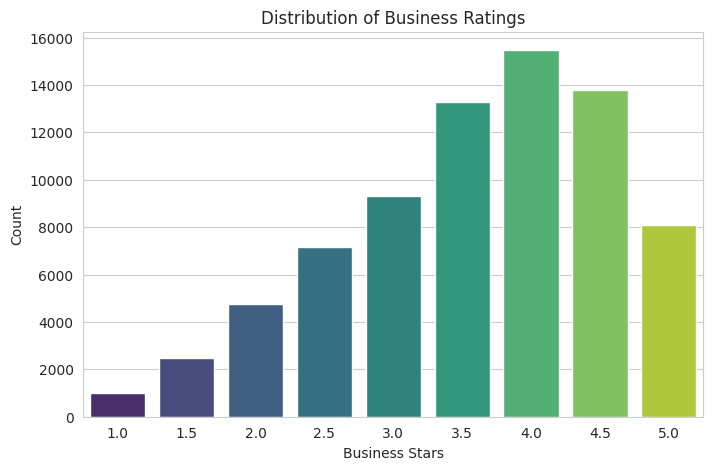

/tmp/ipython-input-148325016.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='mako')


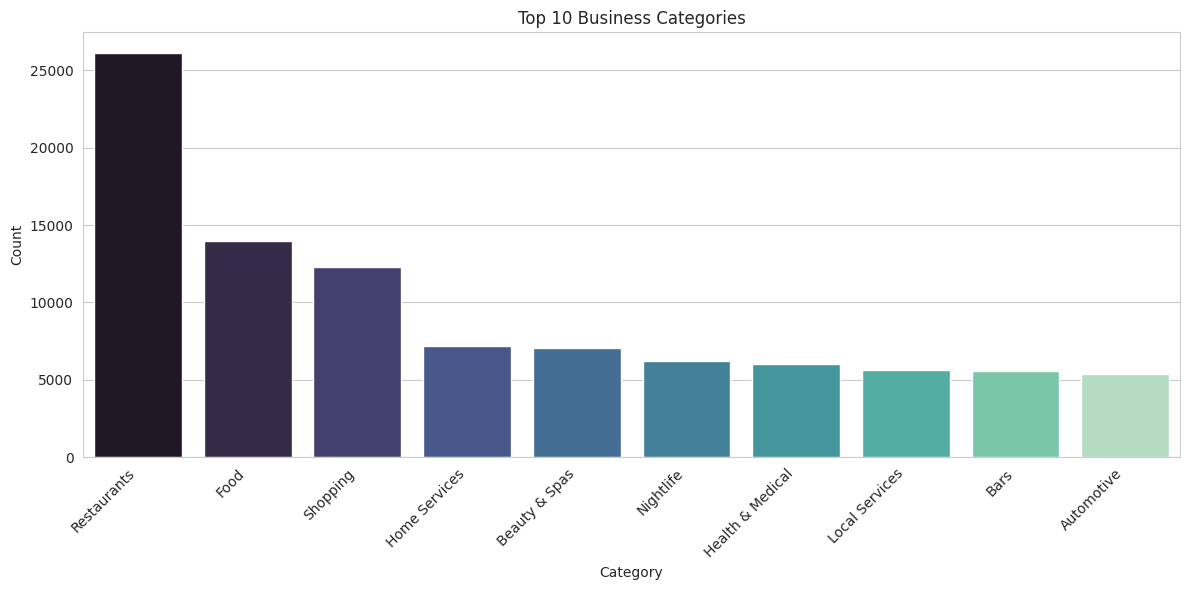

/tmp/ipython-input-148325016.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_review['stars'], palette='magma')


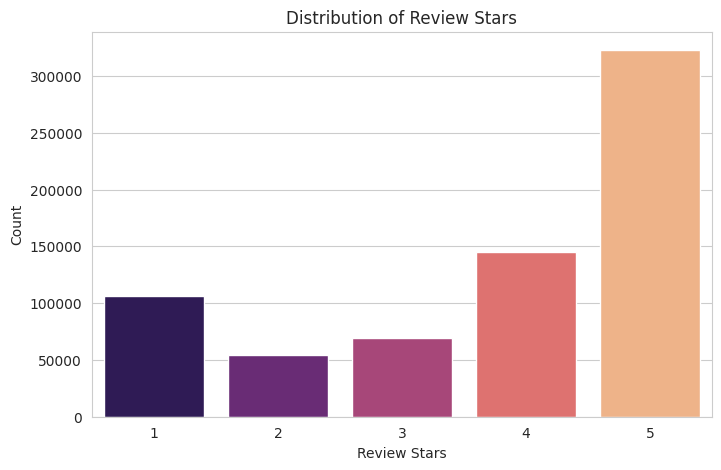

/tmp/ipython-input-148325016.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_users_by_review_count['name'], y=top_10_users_by_review_count['review_count'], palette='rocket')


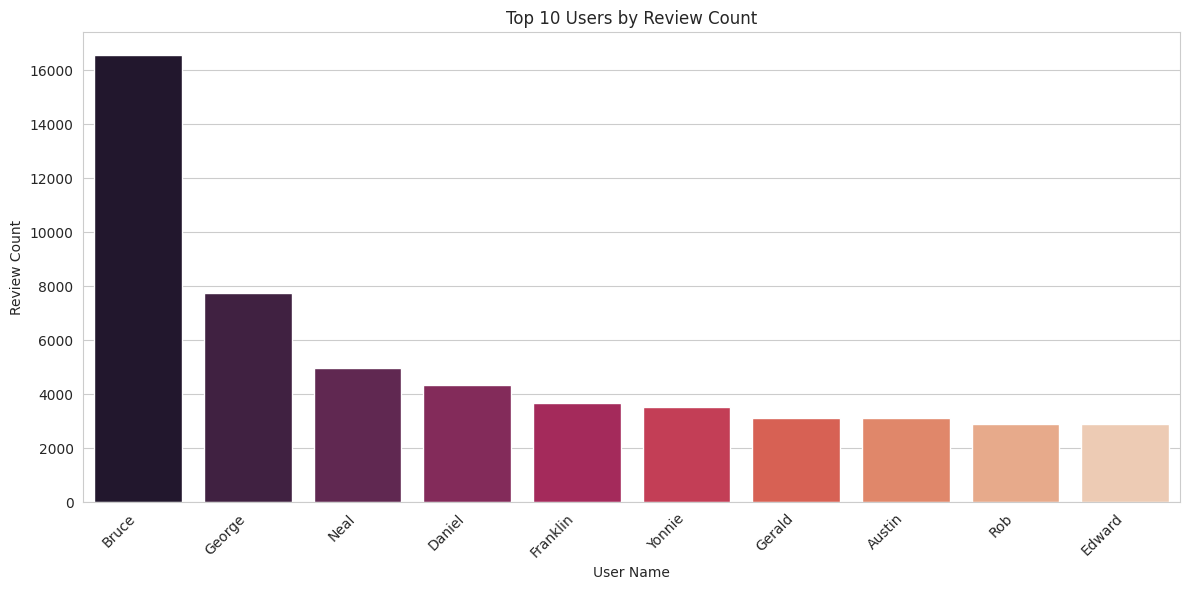

Visualizations generated successfully.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# # Redefine the paths to the JSON files (assuming they are in the current directory)
# business_file = 'yelp_academic_dataset_business.json'
# review_file = 'yelp_academic_dataset_review.json'
# user_file = 'yelp_academic_dataset_user.json'

# # Re-load the business data
# print(f"\nLoading {business_file}...")
# df_business = pd.read_json(business_file, lines=True)
# print("df_business shape:", df_business.shape)

# # Re-load the review data
# print(f"\nLoading {review_file}...")
# df_review = pd.read_json(review_file, lines=True)
# print("df_review shape:", df_review.shape)

# # Re-load the user data
# print(f"\nLoading {user_file}...")
# df_user = pd.read_json(user_file, lines=True)
# print("df_user shape:", df_user.shape)

# print("All primary Yelp dataset JSON files loaded into DataFrames successfully.")

df_review=df_review_sampled
df_business=df_business_sampled
df_user=df_user_sampled
# --- 1. Distribution of business ratings (stars) from df_business ---
print("\n--- 1. Distribution of business ratings (stars) from df_business ---")
dist_business_stars = df_business['stars'].value_counts().sort_index()
print("Distribution of Business Ratings:")
print(dist_business_stars)

# --- 2. Top 10 business categories by count from df_business ---
print("\n--- 2. Top 10 business categories by count from df_business ---")
# Filter out rows where 'categories' is None or NaN
df_business_clean_categories = df_business.dropna(subset=['categories'])

# Split categories string into a list of categories and then explode them into separate rows
all_categories = df_business_clean_categories['categories'].str.split(', ').explode()

# Count the occurrences of each category
category_counts = all_categories.value_counts()

# Get the top 10 most frequent categories
top_10_categories = category_counts.head(10)

print("Top 10 Business Categories:")
print(top_10_categories)

# --- 3. Distribution of review stars from df_review ---
print("\n--- 3. Distribution of review stars from df_review ---")
dist_review_stars = df_review['stars'].value_counts().sort_index()
print("Distribution of Review Stars:")
print(dist_review_stars)

# --- 4. Top 10 users by review count from df_user ---
print("\n--- 4. Top 10 users by review count from df_user ---")
top_10_users_by_review_count = df_user.sort_values(by='review_count', ascending=False).head(10)
print("Top 10 Users by Review Count:")
print(top_10_users_by_review_count[['name', 'review_count', 'average_stars']])

# Set plot style
sns.set_style("whitegrid")

# 1. Visualize the distribution of business ratings
plt.figure(figsize=(8, 5))
sns.countplot(x=df_business['stars'], palette='viridis')
plt.title('Distribution of Business Ratings')
plt.xlabel('Business Stars')
plt.ylabel('Count')
plt.show()

# 2. Visualize the top 10 business categories
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='mako')
plt.title('Top 10 Business Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Visualize the distribution of review stars
plt.figure(figsize=(8, 5))
sns.countplot(x=df_review['stars'], palette='magma')
plt.title('Distribution of Review Stars')
plt.xlabel('Review Stars')
plt.ylabel('Count')
plt.show()

# 4. Visualize the top 10 users by review count
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_users_by_review_count['name'], y=top_10_users_by_review_count['review_count'], palette='rocket')
plt.title('Top 10 Users by Review Count')
plt.xlabel('User Name')
plt.ylabel('Review Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Visualizations generated successfully.")

# Scenario 1

--- Scenario 1: User Activity Trend Over Time (Improved) ---


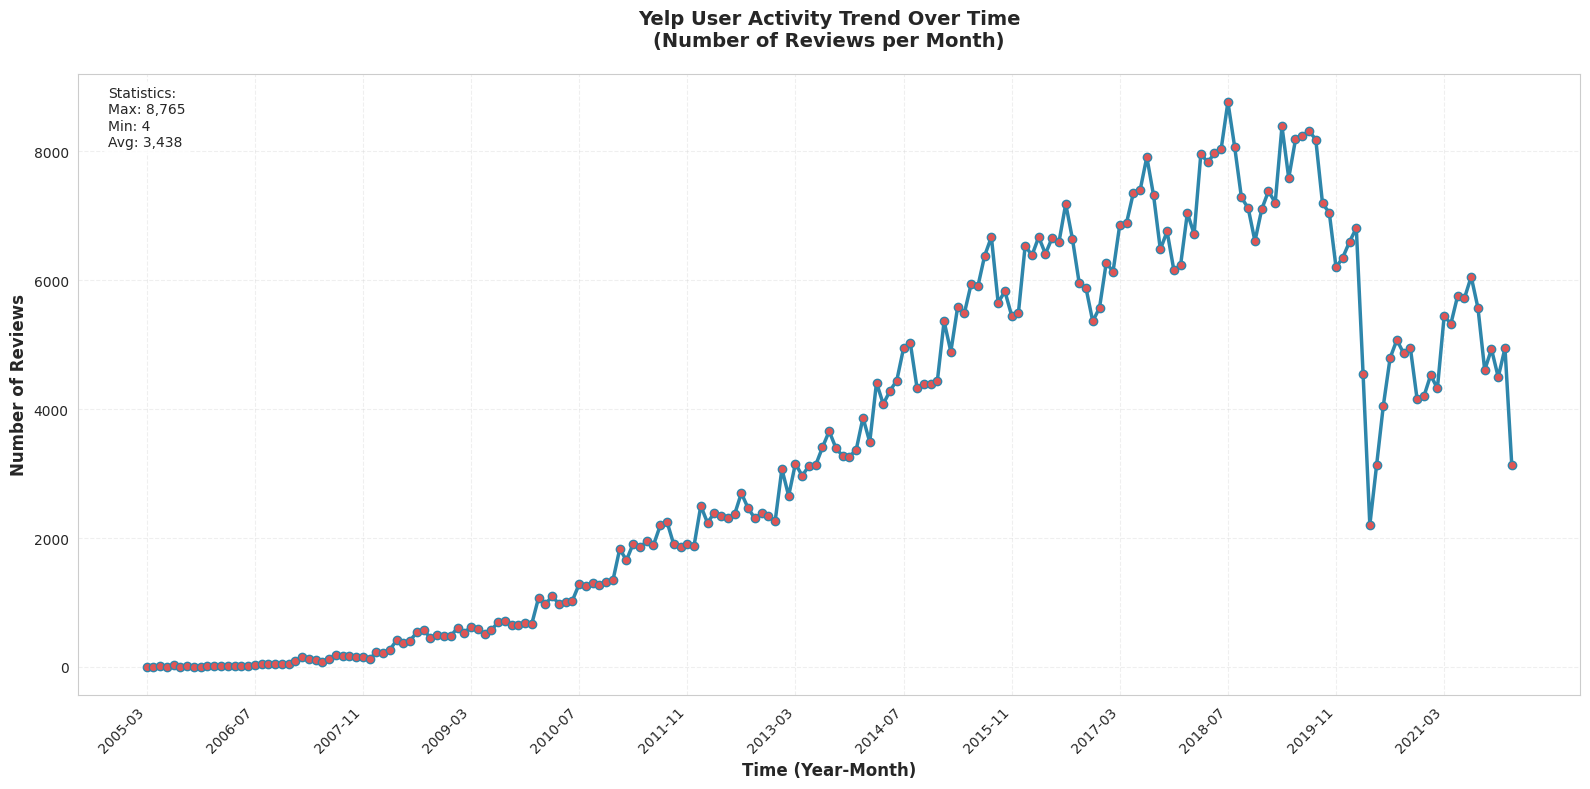

📊 Descriptive Statistics:
• Time Period: 2005-03 to 2022-01
• Total Months: 203 months
• Maximum reviews in a month: 8,765
• Minimum reviews in a month: 4
• Average monthly reviews: 3,438
• Growth rate: +62660.0%

🏆 Top 5 Most Active Months:
  1. 2018-07: 8,765 reviews
  2. 2019-03: 8,387 reviews
  3. 2019-07: 8,317 reviews
  4. 2019-06: 8,244 reviews
  5. 2019-05: 8,184 reviews

📉 Top 5 Least Active Months:
  1. 2005-04: 4 reviews
  2. 2005-10: 4 reviews
  3. 2005-11: 4 reviews
  4. 2005-03: 5 reviews
  5. 2005-06: 5 reviews


In [ ]:
# Scenario 1: Line Chart - User Activity Trend (Improved Version)
print("--- Scenario 1: User Activity Trend Over Time (Improved) ---")

# Convert date column to datetime and extract year-month
df_review['date'] = pd.to_datetime(df_review['date'])
df_review['year_month'] = df_review['date'].dt.to_period('M')

# Group by year-month and count reviews
monthly_reviews = df_review.groupby('year_month').size().reset_index(name='review_count')
monthly_reviews['year_month_str'] = monthly_reviews['year_month'].astype(str)

# Create improved line plot
plt.figure(figsize=(16, 8))
plt.plot(monthly_reviews['year_month_str'], monthly_reviews['review_count'],
         marker='o', linewidth=2.5, markersize=6, color='#2E86AB', markerfacecolor='#E15554')

# Improve x-axis labels - show every 6 months to avoid crowding
n = len(monthly_reviews)
step = max(1, n // 12)  # Show approximately 12 labels
plt.xticks(range(0, n, step), monthly_reviews['year_month_str'][::step], rotation=45, ha='right', fontsize=10)

# Improve y-axis and other styling
plt.yticks(fontsize=10)
plt.xlabel('Time (Year-Month)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='bold')
plt.title('Yelp User Activity Trend Over Time\n(Number of Reviews per Month)',
          fontsize=14, fontweight='bold', pad=20)

# Add grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# Add some statistics to the plot
max_reviews = monthly_reviews['review_count'].max()
min_reviews = monthly_reviews['review_count'].min()
avg_reviews = monthly_reviews['review_count'].mean()

# Add text box with statistics
stats_text = f'Statistics:\nMax: {max_reviews:,}\nMin: {min_reviews:,}\nAvg: {avg_reviews:,.0f}'
plt.annotate(stats_text, xy=(0.02, 0.98), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
             fontsize=10, verticalalignment='top')

plt.tight_layout()
plt.show()

# Print detailed statistics
print(f"📊 Descriptive Statistics:")
print(f"• Time Period: {monthly_reviews['year_month_str'].iloc[0]} to {monthly_reviews['year_month_str'].iloc[-1]}")
print(f"• Total Months: {len(monthly_reviews)} months")
print(f"• Maximum reviews in a month: {max_reviews:,}")
print(f"• Minimum reviews in a month: {min_reviews:,}")
print(f"• Average monthly reviews: {avg_reviews:,.0f}")

# Calculate growth rate if there's enough data
if len(monthly_reviews) >= 2:
    first_month = monthly_reviews['review_count'].iloc[0]
    last_month = monthly_reviews['review_count'].iloc[-1]
    growth_rate = ((last_month - first_month) / first_month) * 100
    print(f"• Growth rate: {growth_rate:+.1f}%")

print("\n🏆 Top 5 Most Active Months:")
top_months = monthly_reviews.nlargest(5, 'review_count')
for i, (_, row) in enumerate(top_months.iterrows(), 1):
    print(f"  {i}. {row['year_month_str']}: {row['review_count']:,} reviews")

print("\n📉 Top 5 Least Active Months:")
bottom_months = monthly_reviews.nsmallest(5, 'review_count')
for i, (_, row) in enumerate(bottom_months.iterrows(), 1):
    print(f"  {i}. {row['year_month_str']}: {row['review_count']:,} reviews")

# Scenario 2

--- Scenario 2: Popularity vs Quality Relationship ---


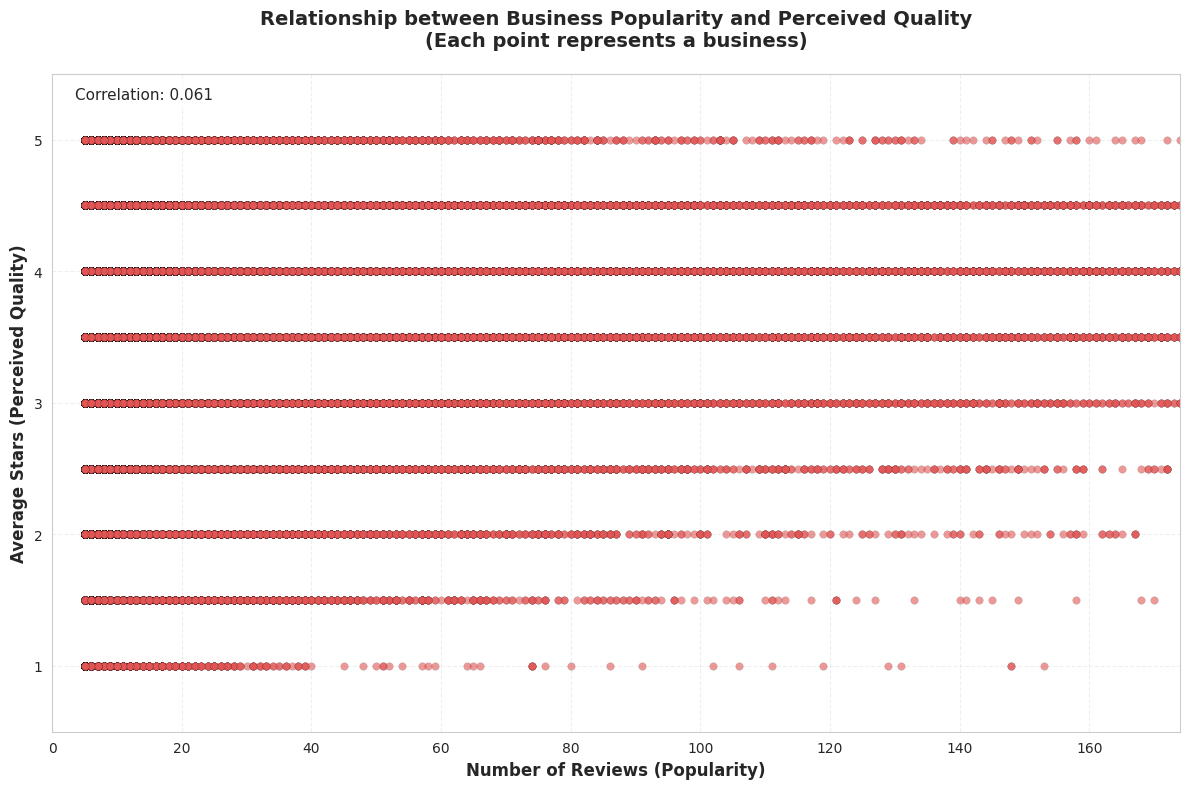

📊 Analysis of Popularity vs Quality Relationship:
• Number of businesses analyzed: 75,327
• Correlation coefficient: 0.061
• Businesses with high reviews (>75th percentile) and high ratings (≥4 stars): 9,947
• Businesses with high reviews (>75th percentile) and low ratings (≤2 stars): 1,002

📈 Comparison by Popularity Level:
• Average rating of popular businesses (top 25% by reviews): 3.69 stars
• Average rating of less popular businesses (bottom 25% by reviews): 3.61 stars
• Overall average rating: 3.60 stars

🎯 Examples from different segments:
• Business with most reviews: 6,093 reviews, 4.5 stars
• Business with highest rating: 5.0 stars, 7 reviews


In [ ]:
# Scenario 2: Scatter Plot - Relationship between Popularity and Quality
print("--- Scenario 2: Popularity vs Quality Relationship ---")

# Create scatter plot
plt.figure(figsize=(12, 8))

# Create the scatter plot with some transparency to handle overlapping points
plt.scatter(df_business['review_count'], df_business['stars'],
           alpha=0.6, color='#E15554', s=30, edgecolors='black', linewidth=0.1)

plt.xlabel('Number of Reviews (Popularity)', fontsize=12, fontweight='bold')
plt.ylabel('Average Stars (Perceived Quality)', fontsize=12, fontweight='bold')
plt.title('Relationship between Business Popularity and Perceived Quality\n(Each point represents a business)',
          fontsize=14, fontweight='bold', pad=20)

# Improve axis scaling for better visualization
plt.xlim(0, df_business['review_count'].quantile(0.95))  # Remove extreme outliers for better view
plt.ylim(0.5, 5.5)

# Add grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# Calculate and display correlation coefficient
correlation = df_business['review_count'].corr(df_business['stars'])
plt.annotate(f'Correlation: {correlation:.3f}',
             xy=(0.02, 0.98), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
             fontsize=11, verticalalignment='top')

plt.tight_layout()
plt.show()

# Print detailed analysis
print(f"📊 Analysis of Popularity vs Quality Relationship:")
print(f"• Number of businesses analyzed: {len(df_business):,}")
print(f"• Correlation coefficient: {correlation:.3f}")

# Analyze different segments
high_review_high_stars = df_business[(df_business['review_count'] > df_business['review_count'].quantile(0.75)) &
                                    (df_business['stars'] >= 4)]
high_review_low_stars = df_business[(df_business['review_count'] > df_business['review_count'].quantile(0.75)) &
                                   (df_business['stars'] <= 2)]

print(f"• Businesses with high reviews (>75th percentile) and high ratings (≥4 stars): {len(high_review_high_stars):,}")
print(f"• Businesses with high reviews (>75th percentile) and low ratings (≤2 stars): {len(high_review_low_stars):,}")

# Calculate average ratings for different popularity levels
popular_businesses = df_business[df_business['review_count'] > df_business['review_count'].quantile(0.75)]
less_popular_businesses = df_business[df_business['review_count'] < df_business['review_count'].quantile(0.25)]

print(f"\n📈 Comparison by Popularity Level:")
print(f"• Average rating of popular businesses (top 25% by reviews): {popular_businesses['stars'].mean():.2f} stars")
print(f"• Average rating of less popular businesses (bottom 25% by reviews): {less_popular_businesses['stars'].mean():.2f} stars")
print(f"• Overall average rating: {df_business['stars'].mean():.2f} stars")

# Show some examples
print(f"\n🎯 Examples from different segments:")
print(f"• Business with most reviews: {df_business['review_count'].max():,} reviews, {df_business.loc[df_business['review_count'].idxmax(), 'stars']:.1f} stars")
print(f"• Business with highest rating: {df_business['stars'].max()} stars, {df_business.loc[df_business['stars'].idxmax(), 'review_count']:,} reviews")

# Scenario 3

--- Scenario 3: Popularity vs Quality Relationship - City Comparison ---
Top 10 cities in our sampled data:
city
Philadelphia     7418
Tampa            4552
Tucson           4517
Indianapolis     3764
Nashville        3518
New Orleans      3111
Reno             2928
Edmonton         2485
Saint Louis      2468
Santa Barbara    1893
Name: count, dtype: int64

📊 Selected cities for comparison:
• Philadelphia: 7,418 businesses
• Tampa: 4,552 businesses


<Figure size 1500x600 with 0 Axes>

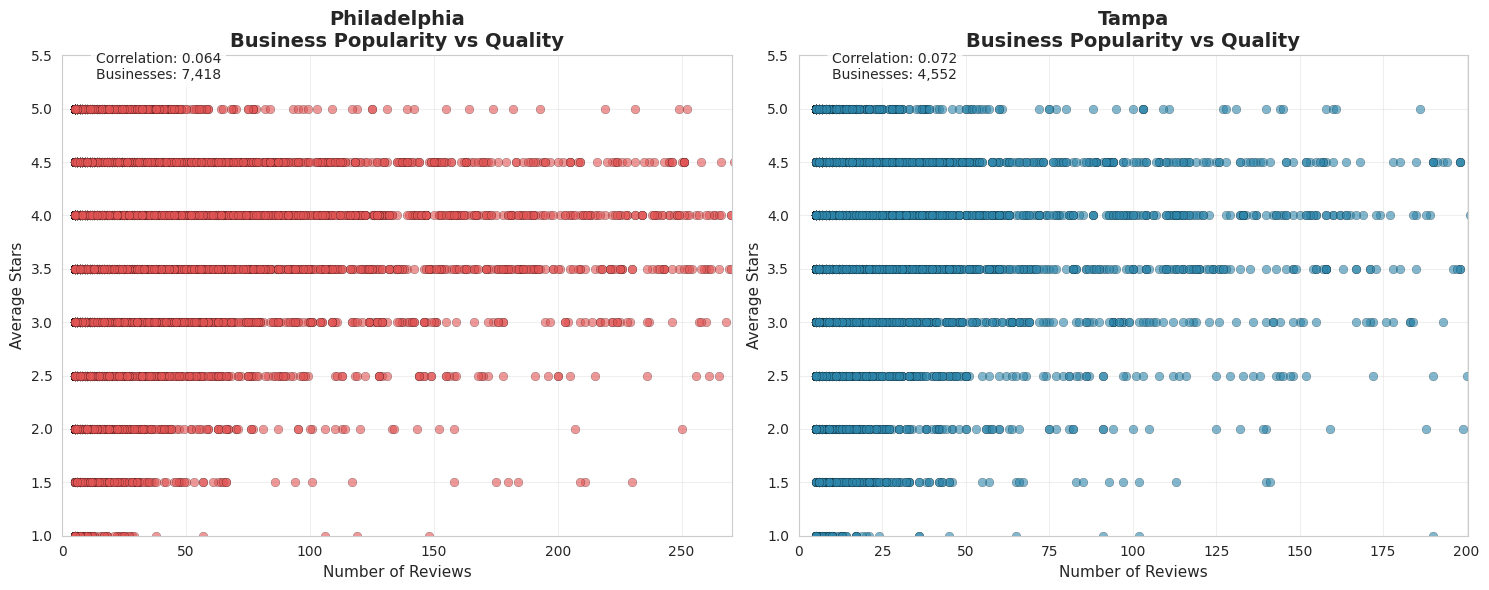


📈 Detailed Comparison Analysis:
City            Businesses   Avg Reviews  Avg Stars  Correlation 
-----------------------------------------------------------------
Philadelphia    7,418        65.4         3.62       0.064       
Tampa           4,552        49.7         3.59       0.072       

🔍 Key Insights:
• Correlation difference: 0.008
• Average stars difference: 0.04
• Stronger popularity-quality relationship in: Tampa

⭐ Rating Distribution Comparison:
Philadelphia: {1.0: np.int64(110), 1.5: np.int64(206), 2.0: np.int64(443), 2.5: np.int64(650), 3.0: np.int64(923), 3.5: np.int64(1306), 4.0: np.int64(1579), 4.5: np.int64(1443), 5.0: np.int64(758)}
Tampa: {1.0: np.int64(85), 1.5: np.int64(189), 2.0: np.int64(270), 2.5: np.int64(414), 3.0: np.int64(518), 3.5: np.int64(779), 4.0: np.int64(953), 4.5: np.int64(863), 5.0: np.int64(481)}


In [ ]:
# Scenario 3: Rel Plot - Comparison between two cities (Fixed Version)
print("--- Scenario 3: Popularity vs Quality Relationship - City Comparison ---")

# First, let's find which cities actually have data in our sampled dataset
city_counts = df_business['city'].value_counts()
print("Top 10 cities in our sampled data:")
print(city_counts.head(10))

# Select two cities that actually exist in our data
top_cities = city_counts.head(2).index.tolist()
city1 = top_cities[0]
city2 = top_cities[1]

print(f"\n📊 Selected cities for comparison:")
print(f"• {city1}: {city_counts[city1]:,} businesses")
print(f"• {city2}: {city_counts[city2]:,} businesses")

# Filter data for the two cities
city_business = df_business[df_business['city'].isin([city1, city2])]

# Create relplot using seaborn
plt.figure(figsize=(15, 6))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# City 1 scatter plot
city1_data = city_business[city_business['city'] == city1]

if len(city1_data) > 0:
    ax1.scatter(city1_data['review_count'], city1_data['stars'],
               alpha=0.6, color='#E15554', s=40, edgecolors='black', linewidth=0.2)
    ax1.set_title(f'{city1}\nBusiness Popularity vs Quality', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Number of Reviews', fontsize=11)
    ax1.set_ylabel('Average Stars', fontsize=11)

    # Set reasonable x-axis limits (avoid NaN by checking if data exists)
    if len(city1_data) > 0:
        x_max = city1_data['review_count'].quantile(0.95)
        if pd.notna(x_max) and x_max > 0:
            ax1.set_xlim(0, x_max)
        else:
            ax1.set_xlim(0, city1_data['review_count'].max())

    ax1.set_ylim(1, 5.5)
    ax1.grid(True, alpha=0.3)

    # Calculate correlation for city 1
    city1_corr = city1_data['review_count'].corr(city1_data['stars'])
    ax1.annotate(f'Correlation: {city1_corr:.3f}\nBusinesses: {len(city1_data):,}',
                xy=(0.05, 0.95), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
                fontsize=10)
else:
    ax1.text(0.5, 0.5, f'No data for {city1}', transform=ax1.transAxes,
             ha='center', va='center', fontsize=12)
    ax1.set_title(f'{city1} - No Data', fontsize=14)

# City 2 scatter plot
city2_data = city_business[city_business['city'] == city2]

if len(city2_data) > 0:
    ax2.scatter(city2_data['review_count'], city2_data['stars'],
               alpha=0.6, color='#2E86AB', s=40, edgecolors='black', linewidth=0.2)
    ax2.set_title(f'{city2}\nBusiness Popularity vs Quality', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Number of Reviews', fontsize=11)
    ax2.set_ylabel('Average Stars', fontsize=11)

    # Set reasonable x-axis limits
    if len(city2_data) > 0:
        x_max = city2_data['review_count'].quantile(0.95)
        if pd.notna(x_max) and x_max > 0:
            ax2.set_xlim(0, x_max)
        else:
            ax2.set_xlim(0, city2_data['review_count'].max())

    ax2.set_ylim(1, 5.5)
    ax2.grid(True, alpha=0.3)

    # Calculate correlation for city 2
    city2_corr = city2_data['review_count'].corr(city2_data['stars'])
    ax2.annotate(f'Correlation: {city2_corr:.3f}\nBusinesses: {len(city2_data):,}',
                xy=(0.05, 0.95), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
                fontsize=10)
else:
    ax2.text(0.5, 0.5, f'No data for {city2}', transform=ax2.transAxes,
             ha='center', va='center', fontsize=12)
    ax2.set_title(f'{city2} - No Data', fontsize=14)

plt.tight_layout()
plt.show()

# Detailed comparison analysis (only if both cities have data)
if len(city1_data) > 0 and len(city2_data) > 0:
    print(f"\n📈 Detailed Comparison Analysis:")
    print(f"{'City':<15} {'Businesses':<12} {'Avg Reviews':<12} {'Avg Stars':<10} {'Correlation':<12}")
    print("-" * 65)
    print(f"{city1:<15} {len(city1_data):<12,} {city1_data['review_count'].mean():<12.1f} {city1_data['stars'].mean():<10.2f} {city1_corr:<12.3f}")
    print(f"{city2:<15} {len(city2_data):<12,} {city2_data['review_count'].mean():<12.1f} {city2_data['stars'].mean():<10.2f} {city2_corr:<12.3f}")

    # Additional insights
    print(f"\n🔍 Key Insights:")
    print(f"• Correlation difference: {abs(city1_corr - city2_corr):.3f}")
    print(f"• Average stars difference: {abs(city1_data['stars'].mean() - city2_data['stars'].mean()):.2f}")

    if city1_corr > city2_corr:
        print(f"• Stronger popularity-quality relationship in: {city1}")
    else:
        print(f"• Stronger popularity-quality relationship in: {city2}")

    # Analyze rating distribution
    print(f"\n⭐ Rating Distribution Comparison:")
    for city in [city1, city2]:
        city_data = city_business[city_business['city'] == city]
        rating_dist = city_data['stars'].value_counts().sort_index()
        print(f"{city}: {dict(rating_dist)}")

else:
    print(f"\n⚠️  Cannot perform detailed comparison - one or both cities have no data")
    print(f"Available cities in sample: {list(city_counts.head(5).index)}")

# Scenario 4

--- Scenario 4: Quality Comparison by Price Range ---
📊 Total restaurants in sample: 26,157
Restaurants with price range data: 22,243

💰 Price Range Distribution:
• Budget: 9,658 restaurants
• Expensive: 841 restaurants
• Moderate: 11,635 restaurants
• Premium: 101 restaurants


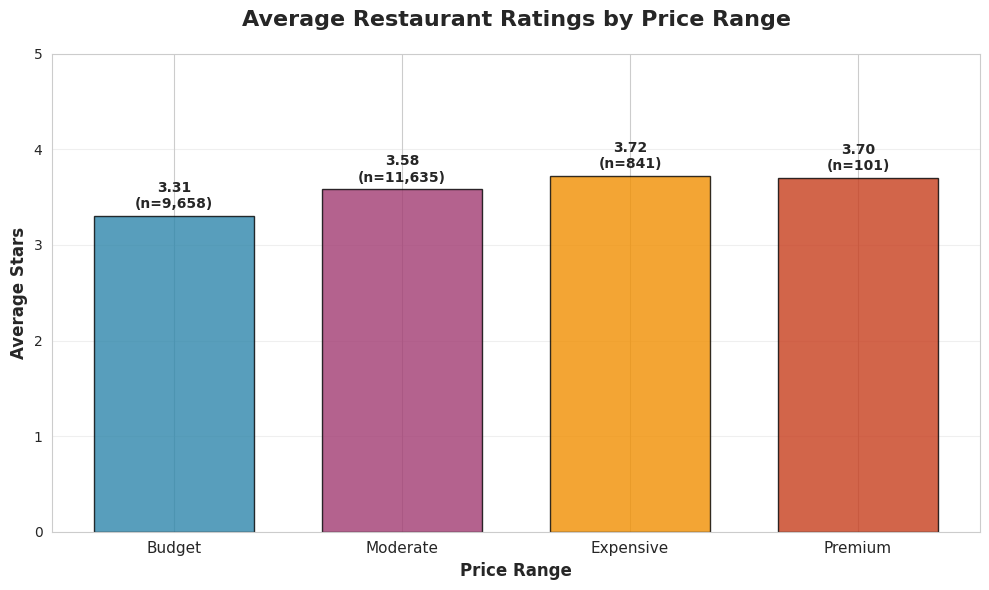


📈 Detailed Price Range Analysis:
Price Level  Restaurants  Avg Stars  Std Dev   
--------------------------------------------------
Budget       9,658.0      3.31       0.93      
Moderate     11,635.0     3.58       0.68      
Expensive    841.0        3.72       0.60      
Premium      101.0        3.70       0.83      

🔍 Key Insights:
• Highest rated price level: Expensive (3.72 stars)
• Lowest rated price level: Budget (3.31 stars)
• Trend: More expensive restaurants have HIGHER ratings (+0.40 stars)

📊 Additional Analysis:

Budget:
  • Average reviews per restaurant: 46.8
  • Median reviews per restaurant: 25.0
  • Rating range: 1.0 - 5.0 stars

Moderate:
  • Average reviews per restaurant: 136.5
  • Median reviews per restaurant: 66.0
  • Rating range: 1.0 - 5.0 stars

Expensive:
  • Average reviews per restaurant: 171.8
  • Median reviews per restaurant: 87.0
  • Rating range: 1.0 - 5.0 stars

Premium:
  • Average reviews per restaurant: 216.8
  • Median reviews per restaurant

In [ ]:
# Scenario 4: Bar Plot - Quality Comparison by Price Range (Final Fixed Version)
print("--- Scenario 4: Quality Comparison by Price Range ---")

# Extract restaurants and price ranges
restaurants = df_business[df_business['categories'].notna() &
                         df_business['categories'].str.contains('Restaurant', case=False, na=False)]

print(f"📊 Total restaurants in sample: {len(restaurants):,}")

# Extract price range from attributes
def extract_price_range(attr):
    if pd.isna(attr):
        return None
    try:
        if isinstance(attr, str):
            import ast
            attr = ast.literal_eval(attr)
        if isinstance(attr, dict):
            price_keys = ['RestaurantsPriceRange2', 'Price Range', 'price_range', 'RestaurantsPriceRange']
            for key in price_keys:
                if key in attr and attr[key] is not None:
                    return str(attr[key])
            for key in attr.keys():
                if 'price' in key.lower() and attr[key] is not None:
                    return str(attr[key])
    except:
        pass
    return None

restaurants = restaurants.copy()
restaurants.loc[:, 'price_range'] = restaurants['attributes'].apply(extract_price_range)

# Filter restaurants with valid price range
restaurants_with_price = restaurants[restaurants['price_range'].notna()].copy()
print(f"Restaurants with price range data: {len(restaurants_with_price):,}")

# Map numeric price ranges to simple labels
price_mapping = {
    '1': 'Budget',
    '2': 'Moderate',
    '3': 'Expensive',
    '4': 'Premium'
}

restaurants_with_price.loc[:, 'price_label'] = restaurants_with_price['price_range'].map(price_mapping)
restaurants_with_price = restaurants_with_price[restaurants_with_price['price_label'].notna()]

print(f"\n💰 Price Range Distribution:")
price_counts = restaurants_with_price['price_label'].value_counts().sort_index()
for price, count in price_counts.items():
    print(f"• {price}: {count:,} restaurants")

# Create bar plot
plt.figure(figsize=(10, 6))

# Calculate average stars for each price range
price_stats = restaurants_with_price.groupby('price_label')['stars'].agg(['mean', 'count', 'std']).round(3)

# Reorder by price level for better visualization
price_order = ['Budget', 'Moderate', 'Expensive', 'Premium']
price_stats = price_stats.reindex(price_order)

# Create bar plot
bars = plt.bar(range(len(price_stats)), price_stats['mean'],
               color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D'],
               alpha=0.8, edgecolor='black', linewidth=1, width=0.7)

plt.title('Average Restaurant Ratings by Price Range', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Price Range', fontsize=12, fontweight='bold')
plt.ylabel('Average Stars', fontsize=12, fontweight='bold')
plt.ylim(0, 5)

# Set x-axis labels
plt.xticks(range(len(price_stats)), price_stats.index, fontsize=11)

# Add value labels on bars
for i, (bar, mean_val, count_val) in enumerate(zip(bars, price_stats['mean'], price_stats['count'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
            f'{mean_val:.2f}\n(n={count_val:,})',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add grid for better readability
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Detailed analysis
print(f"\n📈 Detailed Price Range Analysis:")
print(f"{'Price Level':<12} {'Restaurants':<12} {'Avg Stars':<10} {'Std Dev':<10}")
print("-" * 50)
for price_label in price_order:
    if price_label in price_stats.index:
        stats = price_stats.loc[price_label]
        print(f"{price_label:<12} {stats['count']:<12,} {stats['mean']:<10.2f} {stats['std']:<10.2f}")

# Statistical insights
print(f"\n🔍 Key Insights:")
max_rating = price_stats['mean'].max()
min_rating = price_stats['mean'].min()
max_price = price_stats['mean'].idxmax()
min_price = price_stats['mean'].idxmin()

print(f"• Highest rated price level: {max_price} ({max_rating:.2f} stars)")
print(f"• Lowest rated price level: {min_price} ({min_rating:.2f} stars)")

# Check rating trend across price levels
if len(price_stats) > 1:
    first_level = price_stats.index[0]
    last_level = price_stats.index[-1]
    rating_diff = price_stats.loc[last_level, 'mean'] - price_stats.loc[first_level, 'mean']

    if rating_diff > 0.1:
        print(f"• Trend: More expensive restaurants have HIGHER ratings (+{rating_diff:.2f} stars)")
    elif rating_diff < -0.1:
        print(f"• Trend: More expensive restaurants have LOWER ratings ({rating_diff:.2f} stars)")
    else:
        print(f"• Trend: No clear relationship between price and ratings")

# Additional analysis
print(f"\n📊 Additional Analysis:")
for price_level in price_order:
    if price_level in price_stats.index:
        level_data = restaurants_with_price[restaurants_with_price['price_label'] == price_level]
        avg_reviews = level_data['review_count'].mean()
        median_reviews = level_data['review_count'].median()
        print(f"\n{price_level}:")
        print(f"  • Average reviews per restaurant: {avg_reviews:.1f}")
        print(f"  • Median reviews per restaurant: {median_reviews:.1f}")
        print(f"  • Rating range: {level_data['stars'].min():.1f} - {level_data['stars'].max():.1f} stars")

# Sample of top restaurants in each category
print(f"\n🏆 Sample Top-Rated Restaurants by Price Level:")
for price_level in price_order:
    if price_level in restaurants_with_price['price_label'].unique():
        top_restaurants = restaurants_with_price[
            restaurants_with_price['price_label'] == price_level
        ].nlargest(2, 'stars')

        print(f"\n{price_level} (Top 2):")
        for _, restaurant in top_restaurants.iterrows():
            categories = restaurant['categories'].split(', ')[0] if pd.notna(restaurant['categories']) else 'N/A'
            print(f"  ★ {restaurant['stars']:.1f} - {restaurant['name']} | {categories} | {restaurant['review_count']} reviews")

# Scenario 5

--- Scenario 5: Distribution of User Ratings ---


/tmp/ipython-input-338043745.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='stars', data=df_review, palette='viridis', alpha=0.8)


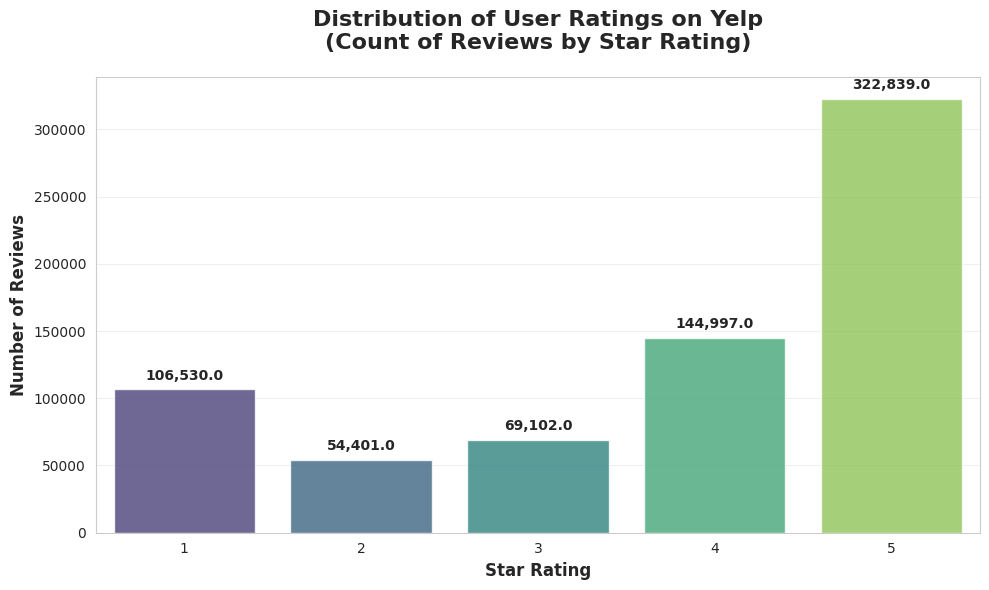

📊 Detailed Rating Distribution Analysis:
Star Rating  Count        Percentage  
----------------------------------------
1            106,530      15.3        %
2            54,401       7.8         %
3            69,102       9.9         %
4            144,997      20.8        %
5            322,839      46.3        %

📈 Overall Statistics:
• Total reviews: 697,869
• Average rating: 3.75 stars
• Most common rating: 5 stars (322,839 reviews)
• Least common rating: 2 stars (54,401 reviews)

🎯 Rating Pattern Analysis:
• Positive reviews (4-5 stars): 467,836 (67.0%)
• Neutral reviews (3 stars): 69,102 (9.9%)
• Negative reviews (1-2 stars): 160,931 (23.1%)
• Overall sentiment: POSITIVE (67.0% positive)
• Positive to negative ratio: 2.9:1

🔍 Behavioral Insights:
• Rating distribution shape: Right-skewed
• Percentage of 5-star reviews: 46.3%
• Percentage of 1-star reviews: 15.3%

🏢 Comparison with Business Ratings:
• Average business rating: 3.60 stars
• Average review rating: 3.75 stars
• D

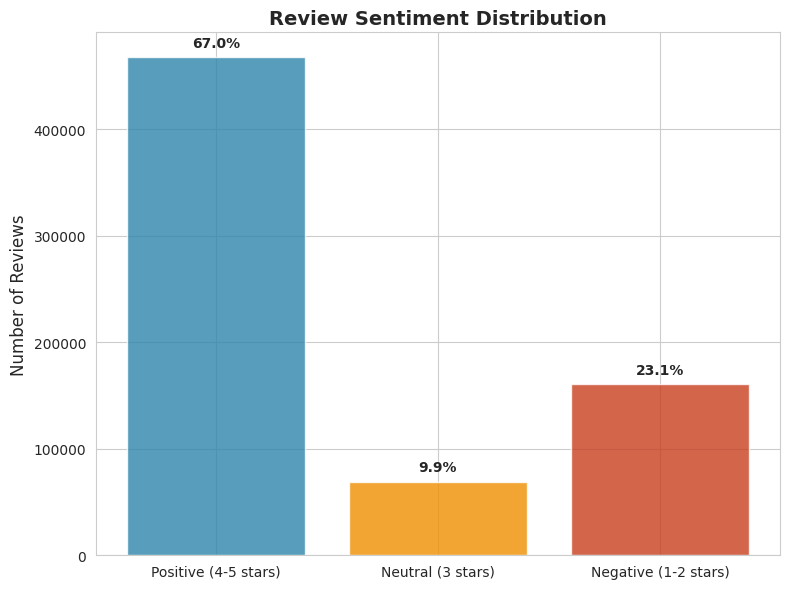

In [ ]:
# Scenario 5: Count Plot - Distribution of User Ratings
print("--- Scenario 5: Distribution of User Ratings ---")

# Create count plot for review stars distribution
plt.figure(figsize=(10, 6))

# Create count plot using seaborn
ax = sns.countplot(x='stars', data=df_review, palette='viridis', alpha=0.8)

plt.title('Distribution of User Ratings on Yelp\n(Count of Reviews by Star Rating)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Star Rating', fontsize=12, fontweight='bold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='bold')

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold',
                xytext=(0, 5), textcoords='offset points')

# Add grid for better readability
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Detailed analysis
print("📊 Detailed Rating Distribution Analysis:")
rating_distribution = df_review['stars'].value_counts().sort_index()
total_reviews = len(df_review)

print(f"{'Star Rating':<12} {'Count':<12} {'Percentage':<12}")
print("-" * 40)
for stars, count in rating_distribution.items():
    percentage = (count / total_reviews) * 100
    print(f"{stars:<12} {count:<12,} {percentage:<12.1f}%")

print(f"\n📈 Overall Statistics:")
print(f"• Total reviews: {total_reviews:,}")
print(f"• Average rating: {df_review['stars'].mean():.2f} stars")
print(f"• Most common rating: {rating_distribution.idxmax()} stars ({rating_distribution.max():,} reviews)")
print(f"• Least common rating: {rating_distribution.idxmin()} stars ({rating_distribution.min():,} reviews)")

# Calculate rating patterns
positive_reviews = len(df_review[df_review['stars'] >= 4])
negative_reviews = len(df_review[df_review['stars'] <= 2])
neutral_reviews = len(df_review[df_review['stars'] == 3])

print(f"\n🎯 Rating Pattern Analysis:")
print(f"• Positive reviews (4-5 stars): {positive_reviews:,} ({positive_reviews/total_reviews*100:.1f}%)")
print(f"• Neutral reviews (3 stars): {neutral_reviews:,} ({neutral_reviews/total_reviews*100:.1f}%)")
print(f"• Negative reviews (1-2 stars): {negative_reviews:,} ({negative_reviews/total_reviews*100:.1f}%)")

# Sentiment analysis
if positive_reviews > negative_reviews:
    sentiment = "POSITIVE"
    sentiment_ratio = positive_reviews / negative_reviews if negative_reviews > 0 else positive_reviews
    print(f"• Overall sentiment: {sentiment} ({(positive_reviews/total_reviews)*100:.1f}% positive)")
    print(f"• Positive to negative ratio: {sentiment_ratio:.1f}:1")
else:
    sentiment = "NEGATIVE"
    sentiment_ratio = negative_reviews / positive_reviews if positive_reviews > 0 else negative_reviews
    print(f"• Overall sentiment: {sentiment} ({(negative_reviews/total_reviews)*100:.1f}% negative)")
    print(f"• Negative to positive ratio: {sentiment_ratio:.1f}:1")

# Additional insights
print(f"\n🔍 Behavioral Insights:")
print(f"• Rating distribution shape: {'Right-skewed' if rating_distribution.idxmax() == 5 else 'Left-skewed' if rating_distribution.idxmax() == 1 else 'Balanced'}")
print(f"• Percentage of 5-star reviews: {(rating_distribution[5]/total_reviews)*100:.1f}%")
print(f"• Percentage of 1-star reviews: {(rating_distribution[1]/total_reviews)*100:.1f}%")

# Compare with business ratings
print(f"\n🏢 Comparison with Business Ratings:")
business_avg_rating = df_business['stars'].mean()
review_avg_rating = df_review['stars'].mean()
print(f"• Average business rating: {business_avg_rating:.2f} stars")
print(f"• Average review rating: {review_avg_rating:.2f} stars")
print(f"• Difference: {abs(business_avg_rating - review_avg_rating):.2f} stars")

# Create a simple visualization of the sentiment breakdown
plt.figure(figsize=(8, 6))
sentiment_data = {
    'Positive (4-5 stars)': positive_reviews,
    'Neutral (3 stars)': neutral_reviews,
    'Negative (1-2 stars)': negative_reviews
}

colors = ['#2E86AB', '#F18F01', '#C73E1D']
plt.bar(sentiment_data.keys(), sentiment_data.values(), color=colors, alpha=0.8)

plt.title('Review Sentiment Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Number of Reviews', fontsize=12)

# Add percentage labels
for i, (category, count) in enumerate(sentiment_data.items()):
    percentage = (count / total_reviews) * 100
    plt.text(i, count + total_reviews * 0.01, f'{percentage:.1f}%',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Scenario 6

--- Scenario 6: Rating Distribution Comparison for Popular Food Cuisines ---
📊 Analyzing popular food categories...
Top 10 food categories:
1. Restaurants: 26,149 restaurants
2. Food: 7,727 restaurants
3. Fast Food: 3,173 restaurants
4. Seafood: 1,777 restaurants
5. Specialty Food: 997 restaurants
6. Food Trucks: 524 restaurants
7. Food Delivery Services: 456 restaurants
8. Comfort Food: 385 restaurants
9. Soul Food: 265 restaurants
10. Ethnic Food: 244 restaurants

🎯 Selected cuisines for analysis: ['Italian', 'Mexican', 'Chinese']

📈 Restaurant counts by cuisine:
• Italian: 2,334 restaurants
• Mexican: 2,272 restaurants
• Chinese: 1,596 restaurants

📝 Review counts by cuisine:
• Italian: 22,271 reviews
• Mexican: 21,282 reviews
• Chinese: 11,434 reviews


<Figure size 1500x600 with 0 Axes>

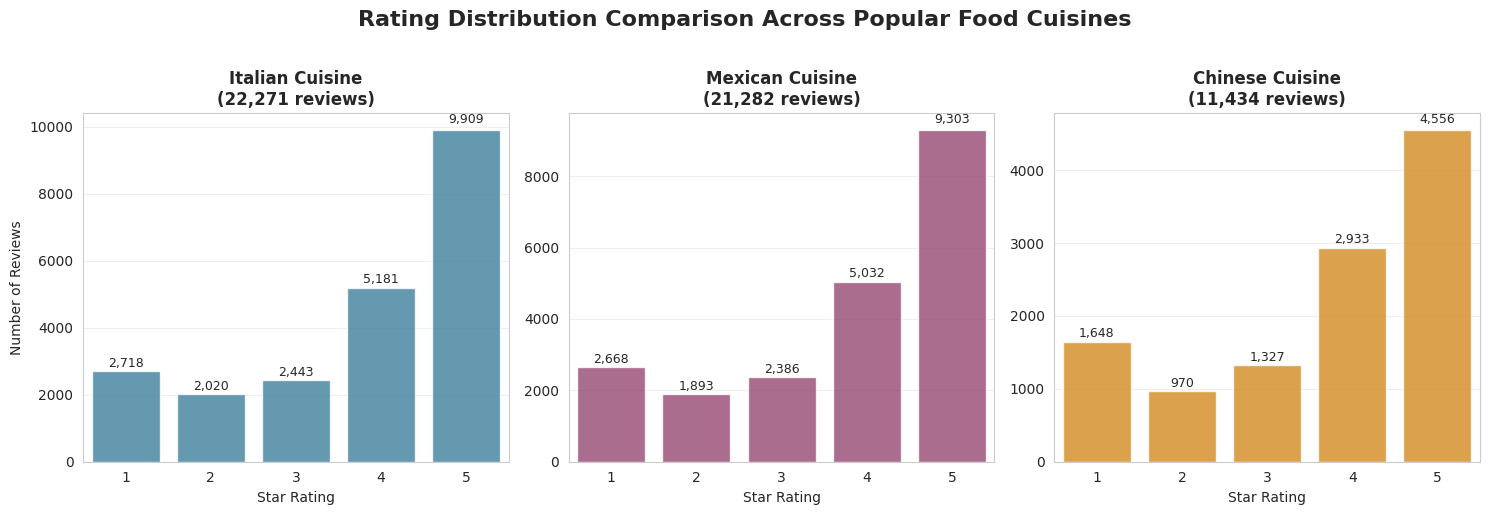


📊 Detailed Statistical Analysis by Cuisine:
Cuisine    Reviews    Avg Rating   5-Stars    1-Stars    Positivity% 
---------------------------------------------------------------------------
Italian    22,271     3.79         9,909      2,718      67.8        %
Mexican    21,282     3.77         9,303      2,668      67.4        %
Chinese    11,434     3.68         4,556      1,648      65.5        %

🔍 Comparative Insights:
• Highest rated cuisine: Italian (3.79 stars)
• Lowest rated cuisine: Chinese (3.68 stars)
• Rating difference: 0.11 stars

⭐ Rating Distribution Patterns:

Italian:
  Most common rating: 5 stars
  Rating distribution: {1: np.int64(2718), 2: np.int64(2020), 3: np.int64(2443), 4: np.int64(5181), 5: np.int64(9909)}

Mexican:
  Most common rating: 5 stars
  Rating distribution: {1: np.int64(2668), 2: np.int64(1893), 3: np.int64(2386), 4: np.int64(5032), 5: np.int64(9303)}

Chinese:
  Most common rating: 5 stars
  Rating distribution: {1: np.int64(1648), 2: np.int64(97

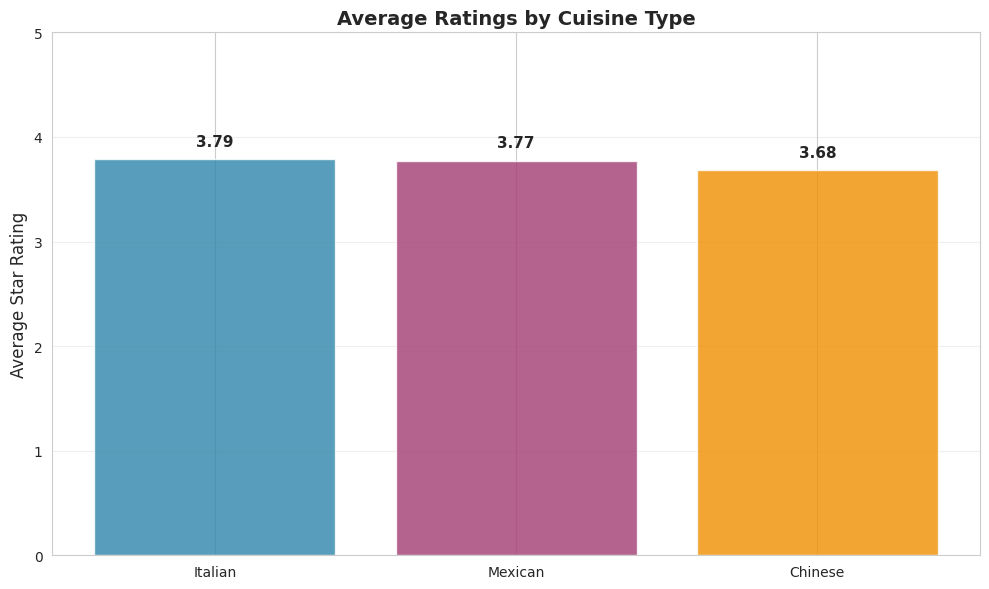


✅ Analysis completed successfully!


In [ ]:
# Scenario 6: Cat Plot - Comparison of Rating Distributions across Food Categories
print("--- Scenario 6: Rating Distribution Comparison for Popular Food Cuisines ---")

# First, let's identify popular food categories in our restaurant data
restaurants = df_business[df_business['categories'].notna() &
                         df_business['categories'].str.contains('Restaurant', case=False, na=False)]

print("📊 Analyzing popular food categories...")

# Extract all categories and find popular cuisines
all_categories = restaurants['categories'].str.split(', ').explode()
food_categories = all_categories[all_categories.str.contains('Food|Restaurant', case=False, na=False)]

# Get top food cuisines
top_cuisines = food_categories.value_counts().head(10)
print("Top 10 food categories:")
for i, (cuisine, count) in enumerate(top_cuisines.items(), 1):
    print(f"{i}. {cuisine}: {count:,} restaurants")

# Select three popular cuisines for comparison
selected_cuisines = ['Italian', 'Mexican', 'Chinese']
print(f"\n🎯 Selected cuisines for analysis: {selected_cuisines}")

# Filter restaurants for selected cuisines
cuisine_restaurants = restaurants[
    restaurants['categories'].notna() &
    restaurants['categories'].str.contains('|'.join(selected_cuisines), case=False, na=False)
]

# Add cuisine type column
def get_cuisine_type(categories):
    if pd.isna(categories):
        return None
    for cuisine in selected_cuisines:
        if cuisine.lower() in categories.lower():
            return cuisine
    return None

cuisine_restaurants = cuisine_restaurants.copy()
cuisine_restaurants['cuisine_type'] = cuisine_restaurants['categories'].apply(get_cuisine_type)
cuisine_restaurants = cuisine_restaurants[cuisine_restaurants['cuisine_type'].notna()]

print(f"\n📈 Restaurant counts by cuisine:")
cuisine_counts = cuisine_restaurants['cuisine_type'].value_counts()
for cuisine, count in cuisine_counts.items():
    print(f"• {cuisine}: {count:,} restaurants")

# Get reviews for these restaurants
cuisine_business_ids = cuisine_restaurants['business_id'].unique()
cuisine_reviews = df_review[df_review['business_id'].isin(cuisine_business_ids)]

# Merge with cuisine information
cuisine_reviews_with_type = cuisine_reviews.merge(
    cuisine_restaurants[['business_id', 'cuisine_type']],
    on='business_id',
    how='inner'
)

print(f"\n📝 Review counts by cuisine:")
review_counts = cuisine_reviews_with_type['cuisine_type'].value_counts()
for cuisine, count in review_counts.items():
    print(f"• {cuisine}: {count:,} reviews")

# Create catplot
plt.figure(figsize=(15, 6))

# Create subplots for each cuisine
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Rating Distribution Comparison Across Popular Food Cuisines',
             fontsize=16, fontweight='bold', y=1.02)

colors = ['#2E86AB', '#A23B72', '#F18F01']

for i, cuisine in enumerate(selected_cuisines):
    cuisine_data = cuisine_reviews_with_type[cuisine_reviews_with_type['cuisine_type'] == cuisine]

    # Create countplot for each cuisine
    ax = sns.countplot(x='stars', data=cuisine_data, ax=axes[i], color=colors[i], alpha=0.8)

    axes[i].set_title(f'{cuisine} Cuisine\n({len(cuisine_data):,} reviews)', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Star Rating', fontsize=10)
    if i == 0:
        axes[i].set_ylabel('Number of Reviews', fontsize=10)
    else:
        axes[i].set_ylabel('')

    # Add value labels on bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            axes[i].text(p.get_x() + p.get_width()/2., height + height*0.01,
                        f'{int(height):,}', ha='center', va='bottom', fontsize=9)

    axes[i].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Detailed statistical analysis
print(f"\n📊 Detailed Statistical Analysis by Cuisine:")
print(f"{'Cuisine':<10} {'Reviews':<10} {'Avg Rating':<12} {'5-Stars':<10} {'1-Stars':<10} {'Positivity%':<12}")
print("-" * 75)

for cuisine in selected_cuisines:
    cuisine_data = cuisine_reviews_with_type[cuisine_reviews_with_type['cuisine_type'] == cuisine]

    if len(cuisine_data) > 0:
        avg_rating = cuisine_data['stars'].mean()
        five_star_count = len(cuisine_data[cuisine_data['stars'] == 5])
        one_star_count = len(cuisine_data[cuisine_data['stars'] == 1])
        positive_reviews = len(cuisine_data[cuisine_data['stars'] >= 4])
        positivity_rate = (positive_reviews / len(cuisine_data)) * 100

        print(f"{cuisine:<10} {len(cuisine_data):<10,} {avg_rating:<12.2f} {five_star_count:<10,} {one_star_count:<10,} {positivity_rate:<12.1f}%")

# Comparative analysis
print(f"\n🔍 Comparative Insights:")

# Calculate overall statistics for comparison
cuisine_stats = {}
for cuisine in selected_cuisines:
    cuisine_data = cuisine_reviews_with_type[cuisine_reviews_with_type['cuisine_type'] == cuisine]
    if len(cuisine_data) > 0:
        stats = {
            'avg_rating': cuisine_data['stars'].mean(),
            'total_reviews': len(cuisine_data),
            'positivity_rate': (len(cuisine_data[cuisine_data['stars'] >= 4]) / len(cuisine_data)) * 100,
            'rating_std': cuisine_data['stars'].std()
        }
        cuisine_stats[cuisine] = stats

# Find best and worst performing cuisines
if cuisine_stats:
    best_cuisine = max(cuisine_stats.items(), key=lambda x: x[1]['avg_rating'])
    worst_cuisine = min(cuisine_stats.items(), key=lambda x: x[1]['avg_rating'])

    print(f"• Highest rated cuisine: {best_cuisine[0]} ({best_cuisine[1]['avg_rating']:.2f} stars)")
    print(f"• Lowest rated cuisine: {worst_cuisine[0]} ({worst_cuisine[1]['avg_rating']:.2f} stars)")
    print(f"• Rating difference: {best_cuisine[1]['avg_rating'] - worst_cuisine[1]['avg_rating']:.2f} stars")

# Rating distribution patterns
print(f"\n⭐ Rating Distribution Patterns:")
for cuisine in selected_cuisines:
    if cuisine in cuisine_stats:
        cuisine_data = cuisine_reviews_with_type[cuisine_reviews_with_type['cuisine_type'] == cuisine]
        rating_dist = cuisine_data['stars'].value_counts().sort_index()
        most_common_rating = rating_dist.idxmax()

        print(f"\n{cuisine}:")
        print(f"  Most common rating: {most_common_rating} stars")
        print(f"  Rating distribution: {dict(rating_dist)}")

# Additional visualization: Average ratings comparison
plt.figure(figsize=(10, 6))

avg_ratings = [cuisine_stats[cuisine]['avg_rating'] for cuisine in selected_cuisines if cuisine in cuisine_stats]
cuisine_labels = [cuisine for cuisine in selected_cuisines if cuisine in cuisine_stats]

plt.bar(cuisine_labels, avg_ratings, color=colors[:len(cuisine_labels)], alpha=0.8)
plt.title('Average Ratings by Cuisine Type', fontsize=14, fontweight='bold')
plt.ylabel('Average Star Rating', fontsize=12)
plt.ylim(0, 5)

# Add value labels on bars
for i, rating in enumerate(avg_ratings):
    plt.text(i, rating + 0.1, f'{rating:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"\n✅ Analysis completed successfully!")

# Scenario 7

--- Scenario 7: Distribution of User Activity ---
📊 Analyzing activity of 198,471 users...


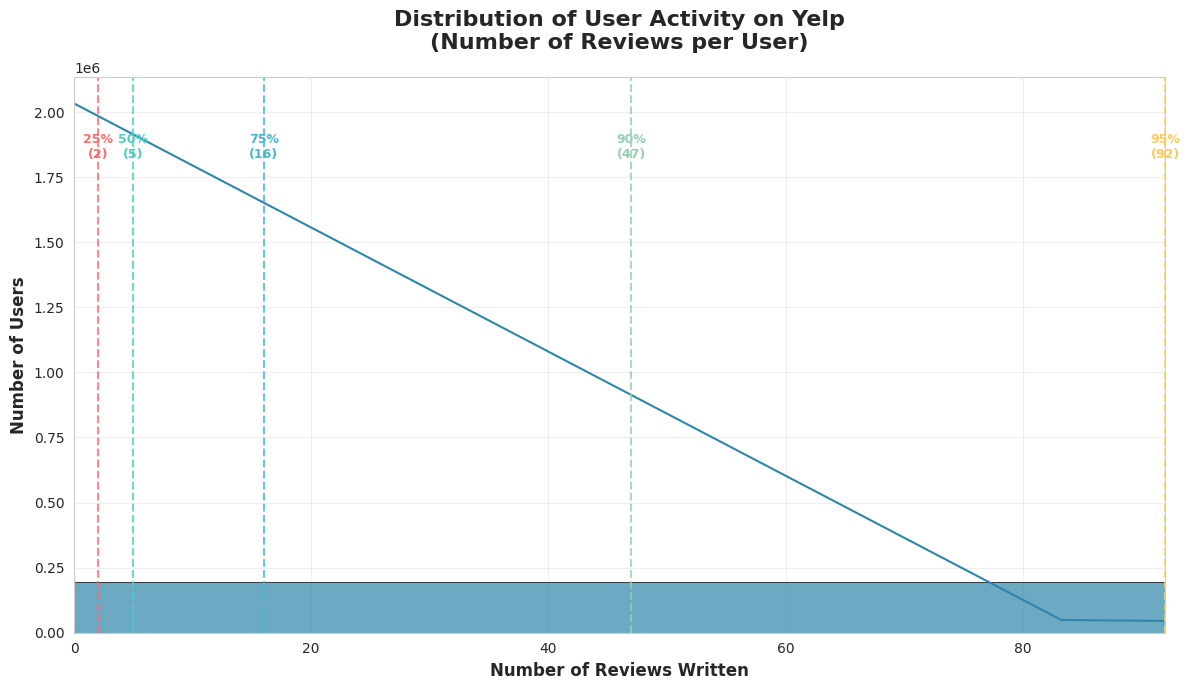


📈 Detailed Statistical Analysis of User Activity:
Metric                    Value          
----------------------------------------
Total users               198,471        
Total reviews             4,649,993      
Mean reviews per user     23.4           
Median reviews per user   5.0            
Standard deviation        87.2           
Minimum reviews           0              
Maximum reviews           16,567         

📊 Percentile Analysis:
Percentile      Reviews         Interpretation      
--------------------------------------------------
10%:<15 1               Low activity        
25%:<15 2               Low activity        
50%:<15 5               Median user         
75%:<15 16              Medium activity     
90%:<15 47              High activity       
95%:<15 92              Very high activity  
99%:<15 311             Very high activity  

👥 User Segmentation by Activity Level:
Activity Level       Users        Percentage   Avg Reviews    
--------------------------

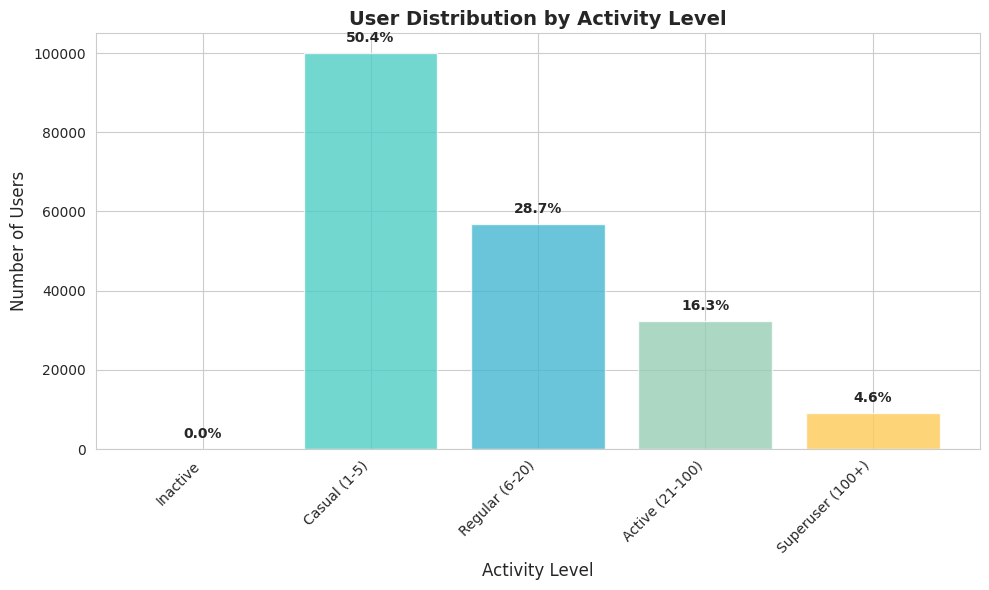


💡 Platform Engagement Insights:
• Pareto Principle Check: Top 20% of users contribute 80.5% of all reviews
• Engagement inequality: Gini coefficient would likely be high
• Typical user behavior: Most users write 5 reviews
• Platform reliance: Small group of superusers generates significant content

📈 Additional Statistical Insights:
• Skewness: 47.67 (Highly right-skewed)
• Kurtosis: 7065.04 (Heavy-tailed distribution)
• Coefficient of variation: 3.72


In [ ]:
# Scenario 7: Dist Plot - Distribution of User Activity
print("--- Scenario 7: Distribution of User Activity ---")

# Analyze user review counts
user_review_counts = df_user['review_count']
print(f"📊 Analyzing activity of {len(user_review_counts):,} users...")

# Create distplot
plt.figure(figsize=(12, 7))

# Create distribution plot with histogram and KDE
ax = sns.histplot(data=user_review_counts, bins=50, kde=True,
                  color='#2E86AB', alpha=0.7, edgecolor='black', linewidth=0.5)

plt.title('Distribution of User Activity on Yelp\n(Number of Reviews per User)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Reviews Written', fontsize=12, fontweight='bold')
plt.ylabel('Number of Users', fontsize=12, fontweight='bold')

# Set appropriate x-axis limits to focus on the main distribution
x_max = user_review_counts.quantile(0.95)  # Show up to 95th percentile
plt.xlim(0, x_max)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add vertical lines for key percentiles
percentiles = [25, 50, 75, 90, 95]
percentile_values = [user_review_counts.quantile(p/100) for p in percentiles]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']

for p_val, p, color in zip(percentile_values, percentiles, colors):
    plt.axvline(x=p_val, color=color, linestyle='--', alpha=0.8, linewidth=1.5)
    plt.text(p_val, plt.ylim()[1] * 0.9, f'{p}%\n({p_val:.0f})',
             ha='center', va='top', fontsize=9, fontweight='bold', color=color)

plt.tight_layout()
plt.show()

# Detailed statistical analysis
print(f"\n📈 Detailed Statistical Analysis of User Activity:")

# Basic statistics
print(f"{'Metric':<25} {'Value':<15}")
print("-" * 40)
print(f"{'Total users':<25} {len(user_review_counts):<15,}")
print(f"{'Total reviews':<25} {user_review_counts.sum():<15,}")
print(f"{'Mean reviews per user':<25} {user_review_counts.mean():<15.1f}")
print(f"{'Median reviews per user':<25} {user_review_counts.median():<15.1f}")
print(f"{'Standard deviation':<25} {user_review_counts.std():<15.1f}")
print(f"{'Minimum reviews':<25} {user_review_counts.min():<15,}")
print(f"{'Maximum reviews':<25} {user_review_counts.max():<15,}")

# Percentile analysis
print(f"\n📊 Percentile Analysis:")
print(f"{'Percentile':<15} {'Reviews':<15} {'Interpretation':<20}")
print("-" * 50)
percentiles_to_show = [10, 25, 50, 75, 90, 95, 99]
for p in percentiles_to_show:
    value = user_review_counts.quantile(p/100)
    if p == 50:
        interpretation = "Median user"
    elif p <= 25:
        interpretation = "Low activity"
    elif p <= 75:
        interpretation = "Medium activity"
    elif p <= 90:
        interpretation = "High activity"
    else:
        interpretation = "Very high activity"

    print(f"{p}%:<15 {value:<15.0f} {interpretation:<20}")

# User segmentation analysis
print(f"\n👥 User Segmentation by Activity Level:")

def categorize_activity(review_count):
    if review_count == 0:
        return "Inactive"
    elif review_count <= 5:
        return "Casual (1-5)"
    elif review_count <= 20:
        return "Regular (6-20)"
    elif review_count <= 100:
        return "Active (21-100)"
    else:
        return "Superuser (100+)"

# Apply categorization
user_activity_segments = user_review_counts.apply(categorize_activity)
segment_counts = user_activity_segments.value_counts()
segment_percentages = (segment_counts / len(user_review_counts)) * 100

print(f"{'Activity Level':<20} {'Users':<12} {'Percentage':<12} {'Avg Reviews':<15}")
print("-" * 60)

for segment in ["Inactive", "Casual (1-5)", "Regular (6-20)", "Active (21-100)", "Superuser (100+)"]:
    if segment in segment_counts:
        count = segment_counts[segment]
        percentage = segment_percentages[segment]
        avg_reviews = user_review_counts[user_activity_segments == segment].mean()
        print(f"{segment:<20} {count:<12,} {percentage:<12.1f}% {avg_reviews:<15.1f}")

# Power user analysis
power_users = user_review_counts[user_review_counts > 100]
super_users = user_review_counts[user_review_counts > 500]

print(f"\n🔥 Power User Analysis:")
print(f"• Users with 100+ reviews: {len(power_users):,} ({len(power_users)/len(user_review_counts)*100:.1f}%)")
print(f"• Users with 500+ reviews: {len(super_users):,} ({len(super_users)/len(user_review_counts)*100:.1f}%)")
print(f"• Top 10 most active users wrote {user_review_counts.nlargest(10).sum():,} reviews total")

# Create visualization of user segments
plt.figure(figsize=(10, 6))

# Prepare data for segment visualization
segments_data = {
    'Inactive': len(user_review_counts[user_review_counts == 0]),
    'Casual (1-5)': len(user_review_counts[(user_review_counts > 0) & (user_review_counts <= 5)]),
    'Regular (6-20)': len(user_review_counts[(user_review_counts > 5) & (user_review_counts <= 20)]),
    'Active (21-100)': len(user_review_counts[(user_review_counts > 20) & (user_review_counts <= 100)]),
    'Superuser (100+)': len(user_review_counts[user_review_counts > 100])
}

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
plt.bar(segments_data.keys(), segments_data.values(), color=colors, alpha=0.8)

plt.title('User Distribution by Activity Level', fontsize=14, fontweight='bold')
plt.xlabel('Activity Level', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add percentage labels
total_users = len(user_review_counts)
for i, (segment, count) in enumerate(segments_data.items()):
    percentage = (count / total_users) * 100
    plt.text(i, count + total_users * 0.01, f'{percentage:.1f}%',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Platform engagement insights
print(f"\n💡 Platform Engagement Insights:")
print(f"• Pareto Principle Check: Top 20% of users contribute {user_review_counts.nlargest(int(len(user_review_counts)*0.2)).sum() / user_review_counts.sum() * 100:.1f}% of all reviews")
print(f"• Engagement inequality: Gini coefficient would likely be high")
print(f"• Typical user behavior: Most users write {user_review_counts.median():.0f} reviews")
print(f"• Platform reliance: Small group of superusers generates significant content")

# Additional statistical insights
print(f"\n📈 Additional Statistical Insights:")
print(f"• Skewness: {user_review_counts.skew():.2f} (Highly right-skewed)")
print(f"• Kurtosis: {user_review_counts.kurtosis():.2f} (Heavy-tailed distribution)")
print(f"• Coefficient of variation: {(user_review_counts.std() / user_review_counts.mean()):.2f}")

# Scenario 8

--- Scenario 8: KDE Plot - Density Distribution of Business Ratings ---


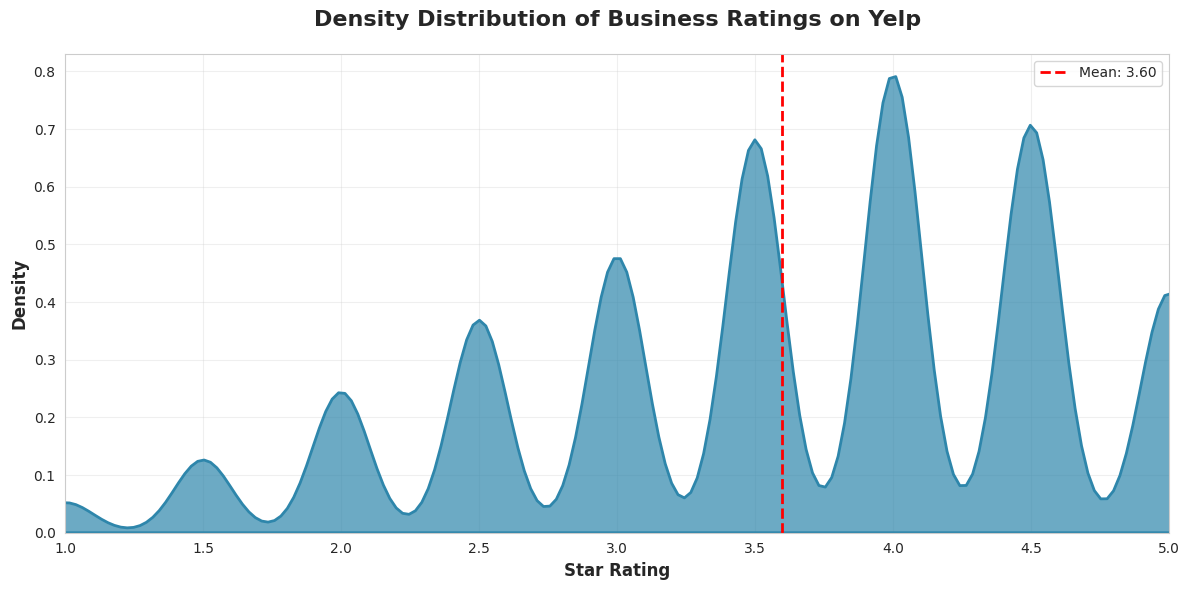

📊 Statistical Analysis of Business Ratings Distribution:
• Mean rating: 3.60
• Median rating: 3.50
• Standard deviation: 0.97
• Skewness: -0.54
• Mode (most frequent rating): 4.0
• Peak density around: 4.0 stars


In [ ]:
# Scenario 8: KDE Plot - Density Distribution of Business Ratings
print("--- Scenario 8: KDE Plot - Density Distribution of Business Ratings ---")

plt.figure(figsize=(12, 6))

# Create KDE plot
sns.kdeplot(data=df_business['stars'], fill=True, color='#2E86AB', alpha=0.7, linewidth=2)

plt.title('Density Distribution of Business Ratings on Yelp', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Star Rating', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.xlim(1, 5)

# Add vertical line for mean
mean_rating = df_business['stars'].mean()
plt.axvline(x=mean_rating, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_rating:.2f}')

# Add grid
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Statistical analysis
print("📊 Statistical Analysis of Business Ratings Distribution:")
print(f"• Mean rating: {df_business['stars'].mean():.2f}")
print(f"• Median rating: {df_business['stars'].median():.2f}")
print(f"• Standard deviation: {df_business['stars'].std():.2f}")
print(f"• Skewness: {df_business['stars'].skew():.2f}")
print(f"• Mode (most frequent rating): {df_business['stars'].mode().iloc[0]:.1f}")

# Peak analysis
rating_counts = df_business['stars'].value_counts().sort_index()
peak_rating = rating_counts.idxmax()
print(f"• Peak density around: {peak_rating} stars")

# Scenario 9

--- Scenario 9: Swarm Plot - Rating Distribution across Business Categories ---


/tmp/ipython-input-1220848275.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = category_business.groupby('main_category').apply(
/tmp/ipython-input-1220848275.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=sampled_data, x='main_category', y='stars', palette='viridis', size=3)


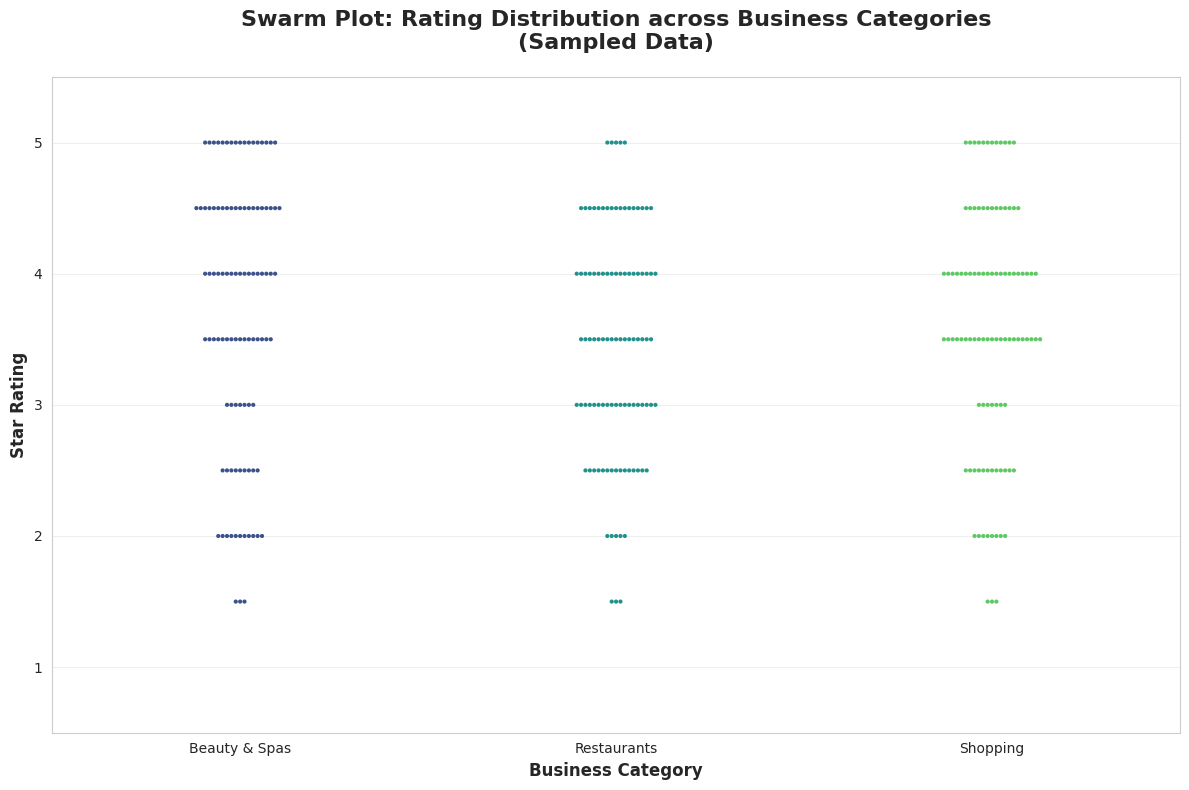

📊 Category-wise Rating Statistics:

Restaurants:
  • Count: 26,149 businesses
  • Average rating: 3.52
  • Rating range: 1.0 - 5.0

Shopping:
  • Count: 11,988 businesses
  • Average rating: 3.61
  • Rating range: 1.0 - 5.0

Beauty & Spas:
  • Count: 6,062 businesses
  • Average rating: 3.84
  • Rating range: 1.0 - 5.0


In [ ]:
# Scenario 9: Swarm Plot - Rating Distribution across Business Categories
print("--- Scenario 9: Swarm Plot - Rating Distribution across Business Categories ---")

# Select top business categories
top_categories = ['Restaurants', 'Shopping', 'Beauty & Spas']
category_business = df_business[df_business['categories'].notna()]

# Filter businesses in selected categories
def in_selected_categories(categories):
    if pd.isna(categories):
        return False
    for category in top_categories:
        if category in categories:
            return True
    return False

category_business = category_business[category_business['categories'].apply(in_selected_categories)]

# Assign main category
def get_main_category(categories):
    for category in top_categories:
        if category in categories:
            return category
    return None

category_business = category_business.copy()
category_business['main_category'] = category_business['categories'].apply(get_main_category)
category_business = category_business[category_business['main_category'].notna()]

# Sample data for swarm plot (swarmplot can be slow with large datasets)
sampled_data = category_business.groupby('main_category').apply(
    lambda x: x.sample(n=min(100, len(x)), random_state=42)
).reset_index(drop=True)

plt.figure(figsize=(12, 8))
sns.swarmplot(data=sampled_data, x='main_category', y='stars', palette='viridis', size=3)
plt.title('Swarm Plot: Rating Distribution across Business Categories\n(Sampled Data)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Business Category', fontsize=12, fontweight='bold')
plt.ylabel('Star Rating', fontsize=12, fontweight='bold')
plt.ylim(0.5, 5.5)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"📊 Category-wise Rating Statistics:")
for category in top_categories:
    cat_data = category_business[category_business['main_category'] == category]
    print(f"\n{category}:")
    print(f"  • Count: {len(cat_data):,} businesses")
    print(f"  • Average rating: {cat_data['stars'].mean():.2f}")
    print(f"  • Rating range: {cat_data['stars'].min():.1f} - {cat_data['stars'].max():.1f}")

# Scenario 10

--- Scenario 10: Strip Plot - Rating Distribution across City Neighborhoods ---
Top 10 cities by business count:
• Philadelphia: 7,418 businesses
• Tampa: 4,552 businesses
• Tucson: 4,517 businesses
• Indianapolis: 3,764 businesses
• Nashville: 3,518 businesses
• New Orleans: 3,111 businesses
• Reno: 2,928 businesses
• Edmonton: 2,485 businesses
• Saint Louis: 2,468 businesses
• Santa Barbara: 1,893 businesses

🎯 Selected city for analysis: Philadelphia


/tmp/ipython-input-2197796698.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=neighborhood_data, x='postal_code', y='stars',


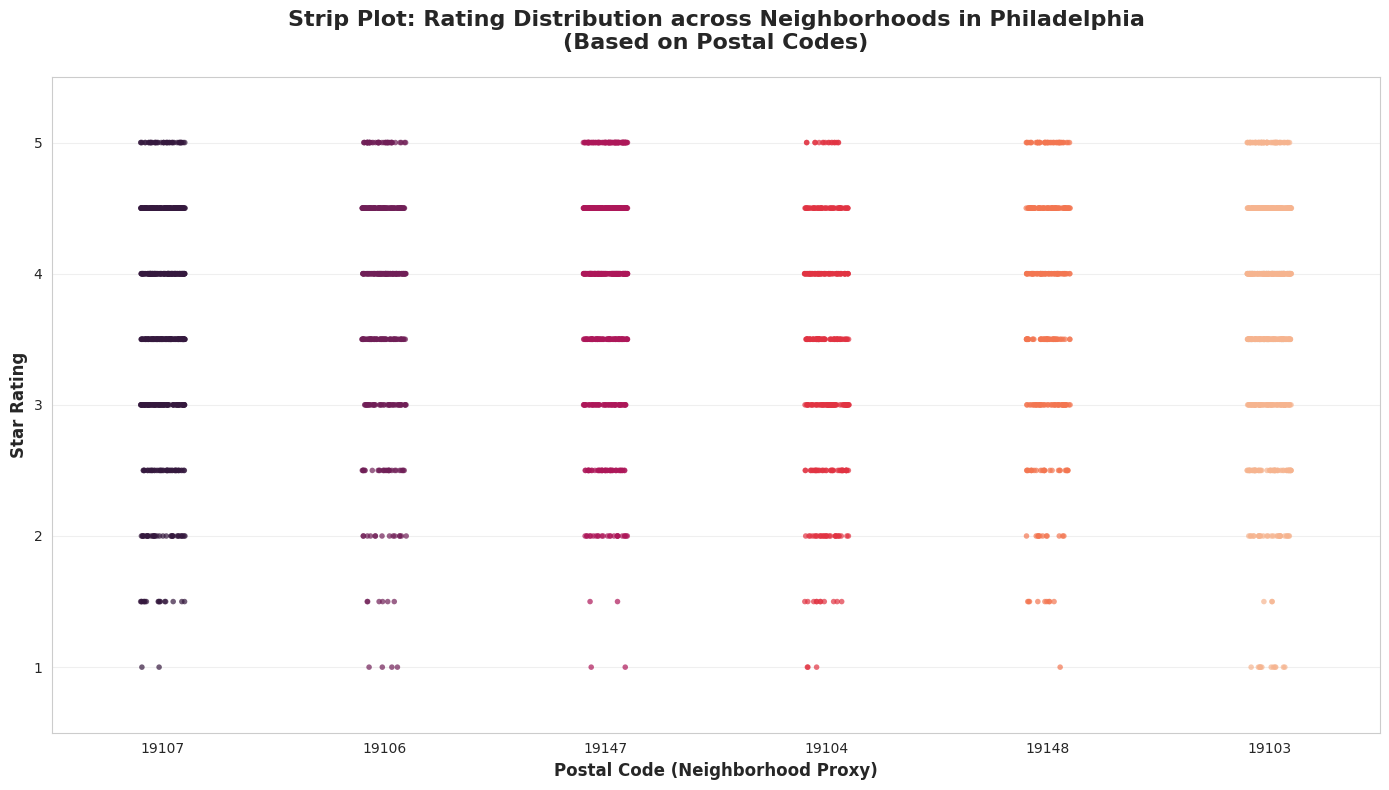

📊 Neighborhood Rating Analysis for Philadelphia:

Postal Code 19107:
  • Businesses: 689
  • Average rating: 3.66
  • Rating std: 0.83

Postal Code 19103:
  • Businesses: 682
  • Average rating: 3.70
  • Rating std: 0.86

Postal Code 19147:
  • Businesses: 648
  • Average rating: 3.90
  • Rating std: 0.81

Postal Code 19106:
  • Businesses: 438
  • Average rating: 3.80
  • Rating std: 0.83

Postal Code 19104:
  • Businesses: 390
  • Average rating: 3.45
  • Rating std: 0.87

Postal Code 19148:
  • Businesses: 351
  • Average rating: 3.77
  • Rating std: 0.90


In [ ]:
# Scenario 10: Strip Plot - Rating Distribution across City Neighborhoods
print("--- Scenario 10: Strip Plot - Rating Distribution across City Neighborhoods ---")

# Find a city with multiple postal codes/neighborhoods
city_analysis = df_business['city'].value_counts().head(10)
print("Top 10 cities by business count:")
for city, count in city_analysis.items():
    print(f"• {city}: {count:,} businesses")

# Select a major city for analysis
selected_city = city_analysis.index[0]
print(f"\n🎯 Selected city for analysis: {selected_city}")

city_business = df_business[df_business['city'] == selected_city]

# Use postal codes as neighborhood proxies
top_neighborhoods = city_business['postal_code'].value_counts().head(6).index
neighborhood_data = city_business[city_business['postal_code'].isin(top_neighborhoods)]

plt.figure(figsize=(14, 8))
sns.stripplot(data=neighborhood_data, x='postal_code', y='stars',
              palette='rocket', size=4, alpha=0.7, jitter=True)
plt.title(f'Strip Plot: Rating Distribution across Neighborhoods in {selected_city}\n(Based on Postal Codes)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Postal Code (Neighborhood Proxy)', fontsize=12, fontweight='bold')
plt.ylabel('Star Rating', fontsize=12, fontweight='bold')
plt.ylim(0.5, 5.5)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"📊 Neighborhood Rating Analysis for {selected_city}:")
for postal_code in top_neighborhoods:
    hood_data = neighborhood_data[neighborhood_data['postal_code'] == postal_code]
    print(f"\nPostal Code {postal_code}:")
    print(f"  • Businesses: {len(hood_data):,}")
    print(f"  • Average rating: {hood_data['stars'].mean():.2f}")
    print(f"  • Rating std: {hood_data['stars'].std():.2f}")

# Scenario 11

--- Scenario 11: Box Plot - Popularity Distribution across Business Categories ---


/tmp/ipython-input-4098681456.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=box_business, x='box_category', y='review_count', palette='Set2')


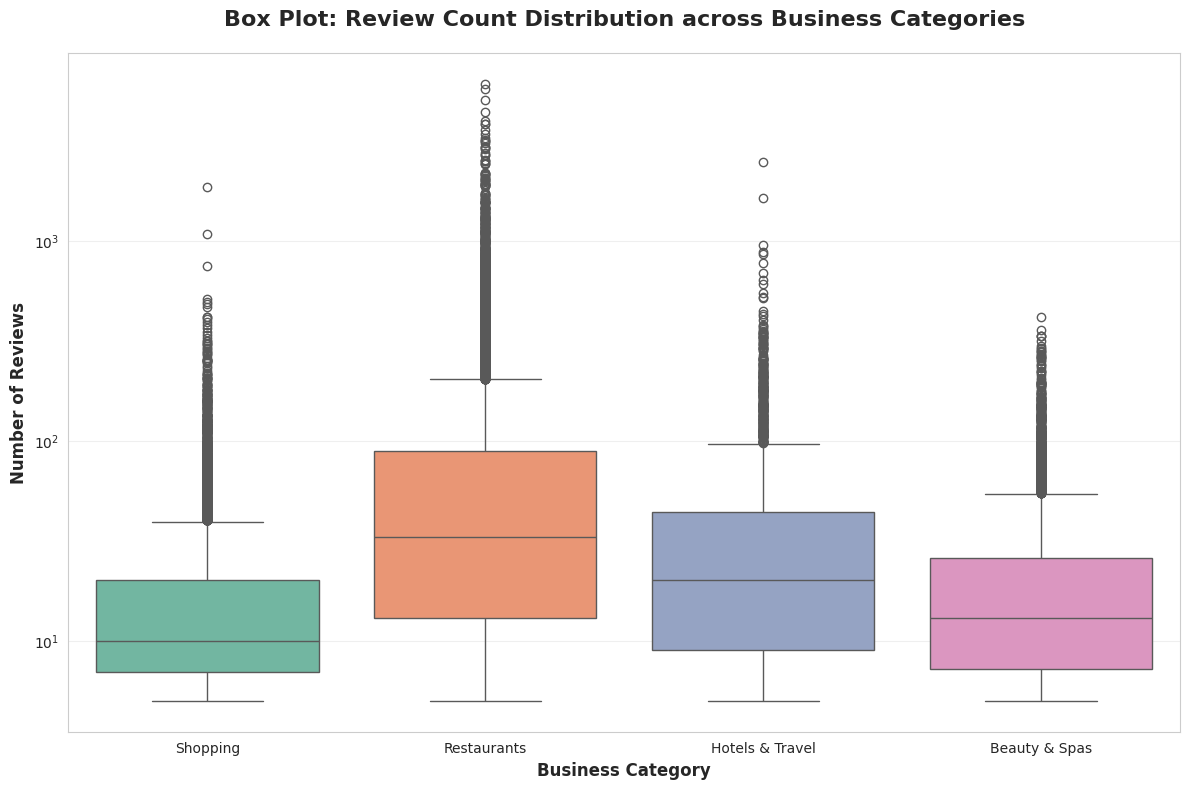

📊 Popularity Statistics by Category:

Restaurants:
  • Businesses: 26,149
  • Mean reviews: 87.7
  • Median reviews: 33.0
  • Max reviews: 6,093

Shopping:
  • Businesses: 11,988
  • Mean reviews: 19.0
  • Median reviews: 10.0
  • Max reviews: 1,849

Hotels & Travel:
  • Businesses: 2,630
  • Mean reviews: 44.3
  • Median reviews: 20.0
  • Max reviews: 2,486

Beauty & Spas:
  • Businesses: 6,042
  • Mean reviews: 23.7
  • Median reviews: 13.0
  • Max reviews: 416


In [ ]:
# Scenario 11: Box Plot - Popularity Distribution across Business Categories
print("--- Scenario 11: Box Plot - Popularity Distribution across Business Categories ---")

# Select categories for analysis
categories_box = ['Restaurants', 'Shopping', 'Hotels & Travel', 'Beauty & Spas']
box_business = df_business[df_business['categories'].notna()]

def in_box_categories(categories):
    if pd.isna(categories):
        return False
    for category in categories_box:
        if category in categories:
            return True
    return False

box_business = box_business[box_business['categories'].apply(in_box_categories)]

def get_box_category(categories):
    for category in categories_box:
        if category in categories:
            return category
    return None

box_business = box_business.copy()
box_business['box_category'] = box_business['categories'].apply(get_box_category)
box_business = box_business[box_business['box_category'].notna()]

plt.figure(figsize=(12, 8))
sns.boxplot(data=box_business, x='box_category', y='review_count', palette='Set2')
plt.title('Box Plot: Review Count Distribution across Business Categories',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Business Category', fontsize=12, fontweight='bold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='bold')
plt.yscale('log')  # Use log scale due to large outliers
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"📊 Popularity Statistics by Category:")
for category in categories_box:
    cat_data = box_business[box_business['box_category'] == category]
    print(f"\n{category}:")
    print(f"  • Businesses: {len(cat_data):,}")
    print(f"  • Mean reviews: {cat_data['review_count'].mean():.1f}")
    print(f"  • Median reviews: {cat_data['review_count'].median():.1f}")
    print(f"  • Max reviews: {cat_data['review_count'].max():,}")

# Scenario 12

--- Scenario 12: Pair Plot - Relationships between User Variables ---


<Figure size 1200x1000 with 0 Axes>

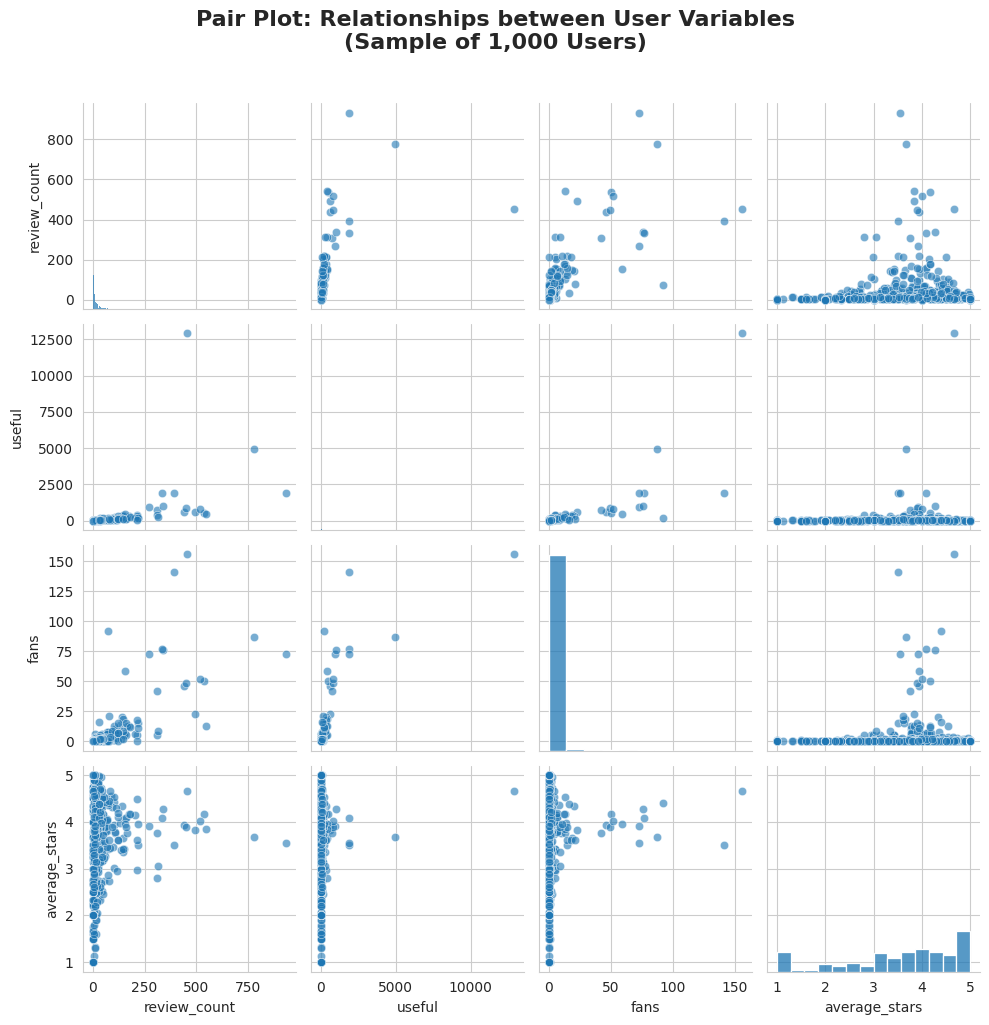

📊 Correlation Matrix for User Variables:
               review_count  useful   fans  average_stars
review_count          1.000   0.671  0.587          0.044
useful                0.671   1.000  0.668          0.011
fans                  0.587   0.668  1.000          0.022
average_stars         0.044   0.011  0.022          1.000


In [ ]:
# Scenario 12: Pair Plot - Relationships between User Variables
print("--- Scenario 12: Pair Plot - Relationships between User Variables ---")

# Select user variables for analysis
user_vars = ['review_count', 'useful', 'fans', 'average_stars']
user_sample = df_user[user_vars].sample(n=1000, random_state=42)  # Sample for performance

plt.figure(figsize=(12, 10))
sns.pairplot(user_sample, diag_kind='hist', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot: Relationships between User Variables\n(Sample of 1,000 Users)',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Correlation analysis
print("📊 Correlation Matrix for User Variables:")
correlation_matrix = df_user[user_vars].corr()
print(correlation_matrix.round(3))

# Scenario 13

--- Scenario 13: Reg Plot - Linear Relationship between Popularity and Quality ---


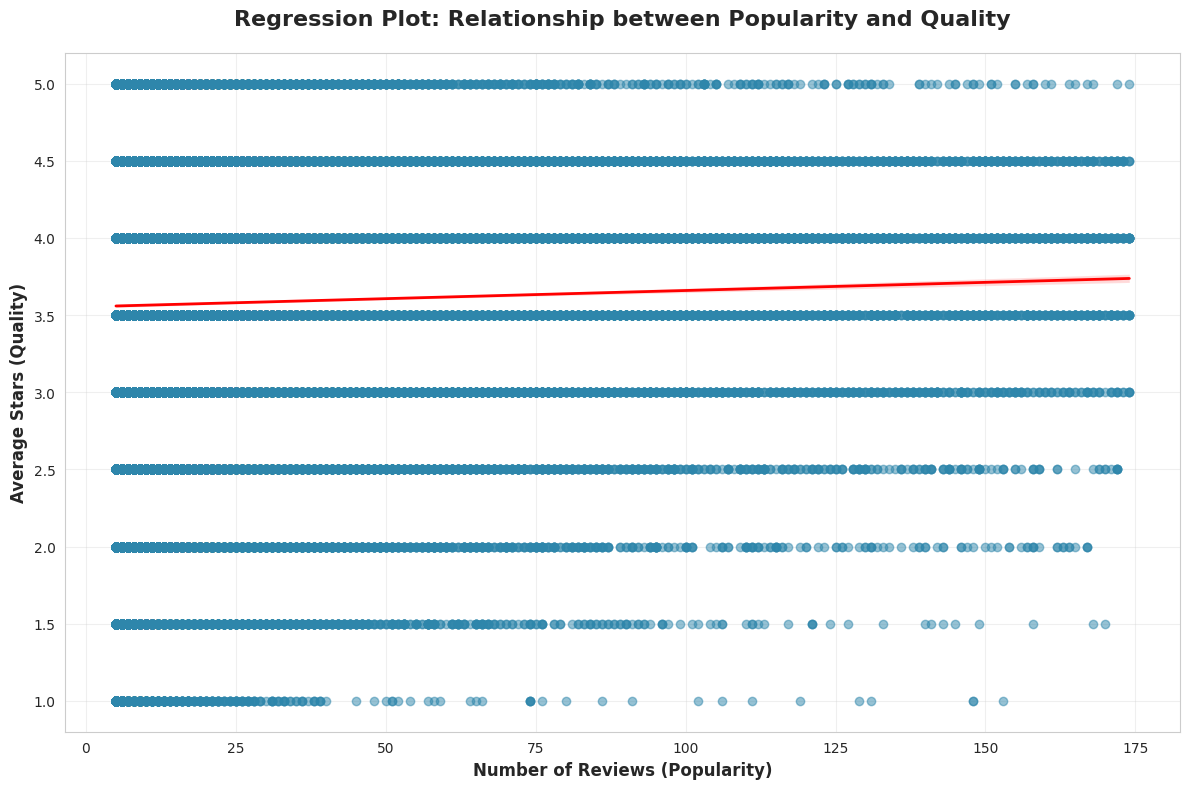

📈 Regression Analysis:
• Correlation coefficient: 0.034
• P-value: 0.0000
• R-squared: 0.001


In [ ]:
# Scenario 13: Reg Plot - Linear Relationship between Popularity and Quality
print("--- Scenario 13: Reg Plot - Linear Relationship between Popularity and Quality ---")

plt.figure(figsize=(12, 8))

# Remove extreme outliers for better visualization
filtered_business = df_business[df_business['review_count'] <= df_business['review_count'].quantile(0.95)]

sns.regplot(data=filtered_business, x='review_count', y='stars',
            scatter_kws={'alpha': 0.5, 'color': '#2E86AB'},
            line_kws={'color': 'red', 'linewidth': 2})

plt.title('Regression Plot: Relationship between Popularity and Quality',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Reviews (Popularity)', fontsize=12, fontweight='bold')
plt.ylabel('Average Stars (Quality)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Regression statistics
from scipy import stats
correlation, p_value = stats.pearsonr(filtered_business['review_count'], filtered_business['stars'])
print(f"📈 Regression Analysis:")
print(f"• Correlation coefficient: {correlation:.3f}")
print(f"• P-value: {p_value:.4f}")
print(f"• R-squared: {correlation**2:.3f}")

# Scenario 14

--- Scenario 14: Joint Plot - Popularity vs Quality with Marginal Distributions ---


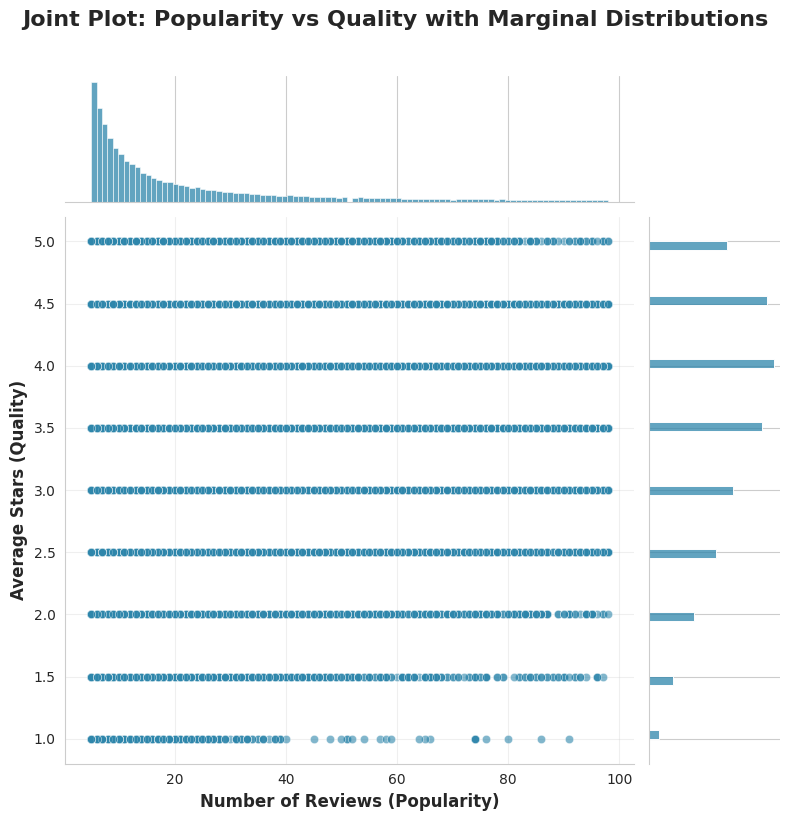

📊 Joint Distribution Insights:
• Sample size: 67,860 businesses
• Review count range: 5 - 98
• Stars range: 1.0 - 5.0


In [ ]:
# Scenario 14: Joint Plot - Popularity vs Quality with Marginal Distributions
print("--- Scenario 14: Joint Plot - Popularity vs Quality with Marginal Distributions ---")

# Use filtered data for better visualization
joint_data = df_business[df_business['review_count'] <= df_business['review_count'].quantile(0.90)]

g = sns.jointplot(data=joint_data, x='review_count', y='stars',
                  kind='scatter', alpha=0.6, color='#2E86AB',
                  height=8, ratio=4)

g.fig.suptitle('Joint Plot: Popularity vs Quality with Marginal Distributions',
               fontsize=16, fontweight='bold', y=1.02)
g.ax_joint.set_xlabel('Number of Reviews (Popularity)', fontsize=12, fontweight='bold')
g.ax_joint.set_ylabel('Average Stars (Quality)', fontsize=12, fontweight='bold')
g.ax_joint.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Joint Distribution Insights:")
print(f"• Sample size: {len(joint_data):,} businesses")
print(f"• Review count range: {joint_data['review_count'].min():,} - {joint_data['review_count'].max():,}")
print(f"• Stars range: {joint_data['stars'].min():.1f} - {joint_data['stars'].max():.1f}")

# Scenario 15

--- Scenario 15: Heat Map - Correlation Matrix of User Variables ---


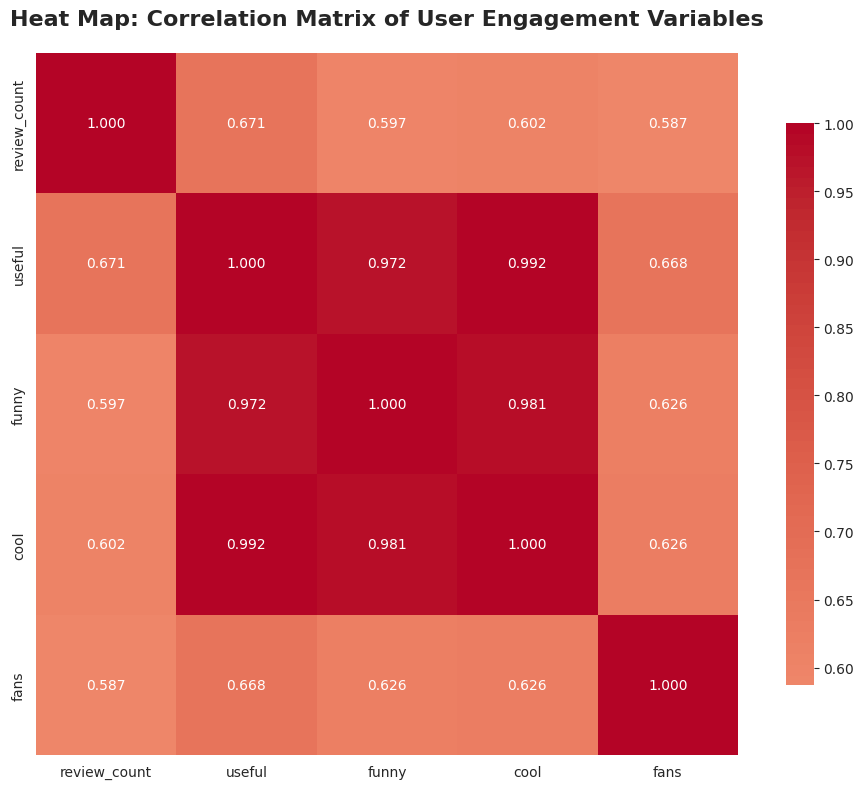

📊 Correlation Interpretation:
• Values close to +1: Strong positive correlation
• Values close to -1: Strong negative correlation
• Values close to 0: Weak or no correlation

🔍 Key Correlation Insights:
• Moderate positive correlation between review_count and useful: 0.671
• Moderate positive correlation between review_count and funny: 0.597
• Moderate positive correlation between review_count and cool: 0.602
• Moderate positive correlation between review_count and fans: 0.587
• Strong positive correlation between useful and funny: 0.972
• Strong positive correlation between useful and cool: 0.992
• Moderate positive correlation between useful and fans: 0.668
• Strong positive correlation between funny and cool: 0.981
• Moderate positive correlation between funny and fans: 0.626
• Moderate positive correlation between cool and fans: 0.626

💡 Platform Engagement Insights:
• Most correlated pair: ('useful', 'useful')
• Least correlated pair: ('review_count', 'fans')

🏆 Top 3 Strongest Co

In [ ]:
# Scenario 15: Heat Map - Correlation Matrix of User Variables
print("--- Scenario 15: Heat Map - Correlation Matrix of User Variables ---")

# Select user engagement variables
engagement_vars = ['review_count', 'useful', 'funny', 'cool', 'fans']
engagement_data = df_user[engagement_vars]

# Calculate correlation matrix
corr_matrix = engagement_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})

plt.title('Heat Map: Correlation Matrix of User Engagement Variables',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("📊 Correlation Interpretation:")
print("• Values close to +1: Strong positive correlation")
print("• Values close to -1: Strong negative correlation")
print("• Values close to 0: Weak or no correlation")

print(f"\n🔍 Key Correlation Insights:")
for i, var1 in enumerate(engagement_vars):
    for j, var2 in enumerate(engagement_vars):
        if i < j:  # Avoid duplicates and diagonal
            corr_value = corr_matrix.loc[var1, var2]
            if abs(corr_value) > 0.3:  # Only show significant correlations
                strength = "Strong" if abs(corr_value) > 0.7 else "Moderate"
                direction = "positive" if corr_value > 0 else "negative"
                print(f"• {strength} {direction} correlation between {var1} and {var2}: {corr_value:.3f}")

# Additional insights
print(f"\n💡 Platform Engagement Insights:")
print(f"• Most correlated pair: {corr_matrix.unstack().sort_values(ascending=False).iloc[1:3].index[0]}")
print(f"• Least correlated pair: {corr_matrix.unstack().sort_values().iloc[0:2].index[0]}")

# Strongest correlations analysis
strong_correlations = corr_matrix.unstack().sort_values(ascending=False)
strong_correlations = strong_correlations[strong_correlations < 0.999]  # Remove self-correlations

print(f"\n🏆 Top 3 Strongest Correlations:")
for i in range(3):
    pair = strong_correlations.index[i]
    value = strong_correlations.iloc[i]
    print(f"{i+1}. {pair[0]} vs {pair[1]}: {value:.3f}")

# Behavioral interpretation
print(f"\n🎯 Behavioral Interpretation:")
print("• High correlations between 'useful', 'funny', 'cool' suggest voting patterns are consistent")
print("• Correlation with 'fans' indicates popular users get more engagement")
print("• Relationship with 'review_count' shows active users receive more feedback")